# LOAD DATA

In [2]:
#IMPORT THƯ VIỆN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [3]:
link_data = 'https://drive.google.com/file/d/1TveX1ZV97goPBniPRHsAa-G3_XF1EJbJ/view'
df = pd.read_csv('https://drive.google.com/uc?export=download&id='+ link_data.split('/')[-2])
pd.set_option('display.max_columns', None)
df.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  Mother's occupation  Father's occupation  \
0                      12                    5                    9   
1                       3                    3                    3   
2                      37                    9                    9   
3                      37                    5                    3   
4                      38                    9                    9   

   Admission grade  Displaced  Educational special needs  Debtor  \
0            127.3          1                          0       0   
1            142.5          1                          0       0   
2            124.8          1                          0       0   
3            119.6          1                          0       0   
4            141.5          0                          0       0   

   Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  \
0                        1       1                   0                 20   
1                        0       1                   0                 19   
2                        0       1                   0                 19   
3                        1       0                   0                 20   
4                        1       0                   0                 45   

   International  Curricular units 1st sem (credited)  \
0              0                                    0   
1              0                                    0   
2              0                                    0   
3              0                                    0   
4              0                                    0   

   Curricular units 1st sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 1st sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                       8   
4                                       9   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                       

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
df.shape

(4424, 37)

In [6]:
#check duplicate
df.duplicated().sum()

0

In [7]:
#check null
df.isnull().sum()*100/len(df)

Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance\t                      0.0
Previous qualification                            0.0
Previous qualification (grade)                    0.0
Nacionality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Admission grade                                   0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                                            0.0
Scholarship holder                                0.0
Age at enrollment                                 0.0
International                                     0.0
Curricular units 1st sem (credited)               0.0
Curricular units 1st sem (enrolled)               0.0
Curricular units 1st sem (evaluations)            0.0
Curricular units 1st sem (approved)               0.0
Curricular units 1st sem (grade)                  0.0
Curricular units 1st sem (without evaluations)    0.0
Curricular units 2nd sem (credited)               0.0
Curricular units 2nd sem (enrolled)               0.0
Curricular units 2nd sem (evaluations)            0.0
Curricular units 2nd sem (approved)               0.0
Curricular units 2nd sem (grade)                  0.0
Curricular units 2nd sem (without evaluations)    0.0
Unemployment rate                                 0.0
Inflation rate                                    0.0
GDP                                               0.0
Target                                            0.0
dtype: float64

In [8]:
#Number of unique value in each column
l1 = []
for col in df.columns:
    l1.append((col,df[col].nunique()))

nu_df = pd.DataFrame(l1, columns=['feature','n_unique'])
nu_df.sort_values(by='n_unique',ascending=True).style.background_gradient(cmap='Greens')

In [9]:
#Categorical columns
cat_cols = ["Marital status", "Application mode", "Course", "Daytime/evening attendance\t",
            "Previous qualification", "Nacionality", "International", "Gender",
            "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation",
            "Displaced", "Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder"]
df[cat_cols]

Marital status  Application mode  Course  Daytime/evening attendance\t  \
0                  1                17     171                             1   
1                  1                15    9254                             1   
2                  1                 1    9070                             1   
3                  1                17    9773                             1   
4                  2                39    8014                             0   
...              ...               ...     ...                           ...   
4419               1                 1    9773                             1   
4420               1                 1    9773                             1   
4421               1                 1    9500                             1   
4422               1                 1    9147                             1   
4423               1                10    9773                             1   

      Previous qualification  Nacionality  International  Gender  \
0                          1            1              0       1   
1                          1            1              0       1   
2                          1            1              0       1   
3                          1            1              0       0   
4                          1            1              0       0   
...                      ...          ...            ...     ...   
4419                       1            1              0       1   
4420                       1          105              1       0   
4421                       1            1              0       0   
4422                       1            1              0       0   
4423                       1           22              1       0   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         19                      12                    5   
1                          1                       3                    3   
2                         37                      37                    9   
3                         38                      37                    5   
4                         37                      38                    9   
...                      ...                     ...                  ...   
4419                       1                       1                    5   
4420                       1                       1                    9   
4421                      37                      37                    9   
4422                      37                      37                    7   
4423                      38                      37                    5   

      Father's occupation  Displaced  Educational special needs  Debtor  \
0                       9          1                          0       0   
1                       3          1                          0       0   
2                       9          1                          0       0   
3                       3          1                          0       0   
4                       9          0                          0       0   
...                   ...        ...                        ...     ...   
4419                    4          0                          0       0   
4420                    9          1                          0       1   
4421                    9          1                          0       0   
4422                    4          1                          0       0   
4423                    9          1                          0       0   

      Tuition fees up to date  Scholarship holder  
0                           1                   0  
1                           0                   0  
2                           0                   0  
3                           1                   0  
4                           1                   0  
...                       ...                 ...  
4419                        1         

In [10]:
#Numerical columns
num_cols = list(set(df.columns) - set(cat_cols) - set(['Target']))
df[num_cols]

Unemployment rate  Application order   GDP  Inflation rate  \
0                  10.8                  5  1.74             1.4   
1                  13.9                  1  0.79            -0.3   
2                  10.8                  5  1.74             1.4   
3                   9.4                  2 -3.12            -0.8   
4                  13.9                  1  0.79            -0.3   
...                 ...                ...   ...             ...   
4419               15.5                  6 -4.06             2.8   
4420               11.1                  2  2.02             0.6   
4421               13.9                  1  0.79            -0.3   
4422                9.4                  1 -3.12            -0.8   
4423               12.7                  1 -1.70             3.7   

      Admission grade  Curricular units 1st sem (enrolled)  \
0               127.3                                    0   
1               142.5                                    6   
2               124.8                                    6   
3               119.6                                    6   
4               141.5                                    6   
...               ...                                  ...   
4419            122.2                                    6   
4420            119.0                                    6   
4421            149.5                                    7   
4422            153.8                                    5   
4423            152.0                                    6   

      Curricular units 1st sem (grade)  Curricular units 2nd sem (enrolled)  \
0                             0.000000                                    0   
1                            14.000000                                    6   
2                             0.000000                                    6   
3                            13.428571                                    6   
4                            12.333333                                    6   
...                                ...                                  ...   
4419                         13.600000                                    6   
4420                         12.000000                                    6   
4421                         14.912500                                    8   
4422                         13.800000                                    5   
4423                         11.666667                                    6   

      Curricular units 1st sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                          8   
4                                          9   
...                                      ...   
4419                                       7   
4420                                       6   
4421                                       8   
4422                                       5   
4423                                       8   

      Curricular units 2nd sem (evaluations)  Age at enrollment  \
0                                          0                 20   
1                                          6                 19   
2                                          0                 19   
3                                         10                 20   
4                                          6                 45   
...                                      ...                ...   
4419                                       8                 19   
4420                                       6                 18   
4421                                       9                 30   
4422                                       6                 20   
4423                                       6                 22   

      Curricular units 2nd sem (approved)  \
0                                       0   
1                      

In [11]:
df[num_cols].describe()

Unemployment rate  Application order          GDP  Inflation rate  \
count        4424.000000        4424.000000  4424.000000     4424.000000   
mean           11.566139           1.727848     0.001969        1.228029   
std             2.663850           1.313793     2.269935        1.382711   
min             7.600000           0.000000    -4.060000       -0.800000   
25%             9.400000           1.000000    -1.700000        0.300000   
50%            11.100000           1.000000     0.320000        1.400000   
75%            13.900000           2.000000     1.790000        2.600000   
max            16.200000           9.000000     3.510000        3.700000   

       Admission grade  Curricular units 1st sem (enrolled)  \
count      4424.000000                          4424.000000   
mean        126.978119                             6.270570   
std          14.482001                             2.480178   
min          95.000000                             0.000000   
25%         117.900000                             5.000000   
50%         126.100000                             6.000000   
75%         134.800000                             7.000000   
max         190.000000                            26.000000   

       Curricular units 1st sem (grade)  Curricular units 2nd sem (enrolled)  \
count                       4424.000000                          4424.000000   
mean                          10.640822                             6.232143   
std                            4.843663                             2.195951   
min                            0.000000                             0.000000   
25%                           11.000000                             5.000000   
50%                           12.285714                             6.000000   
75%                           13.400000                             7.000000   
max                           18.875000                            23.000000   

       Curricular units 1st sem (evaluations)  \
count                             4424.000000   
mean                                 8.299051   
std                                  4.179106   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 45.000000   

       Curricular units 2nd sem (evaluations)  Age at enrollment  \
count                             4424.000000        4424.000000   
mean                                 8.063291          23.265145   
std                                  3.947951           7.587816   
min                                  0.000000          17.000000   
25%                                  6.000000          19.000000   
50%                                  8.000000          20.000000   
75%                                 10.000000          25.000000   
max                                 33.000000          70.000000   

       Curricular units 2nd sem (approved)  \
count                          4424.000000   
mean                              4.435805   
std                               3.014764   
min                               0.000000   
25%                               2.000000   
50%                               5.000000   
75%                               6.000000   
max                              20.000000   

       Curricular units 2nd sem (credited)  Previous qualification (grade)  \
count                          4424.000000                     4424.000000   
mean                              0.541817                      132.613314   
std                               1.918546                       13.188332   
min                               0.000000                       95.000000   
25%                               0.000000                      125.000000   
50%                               0.000000                      133.100000   
75%              

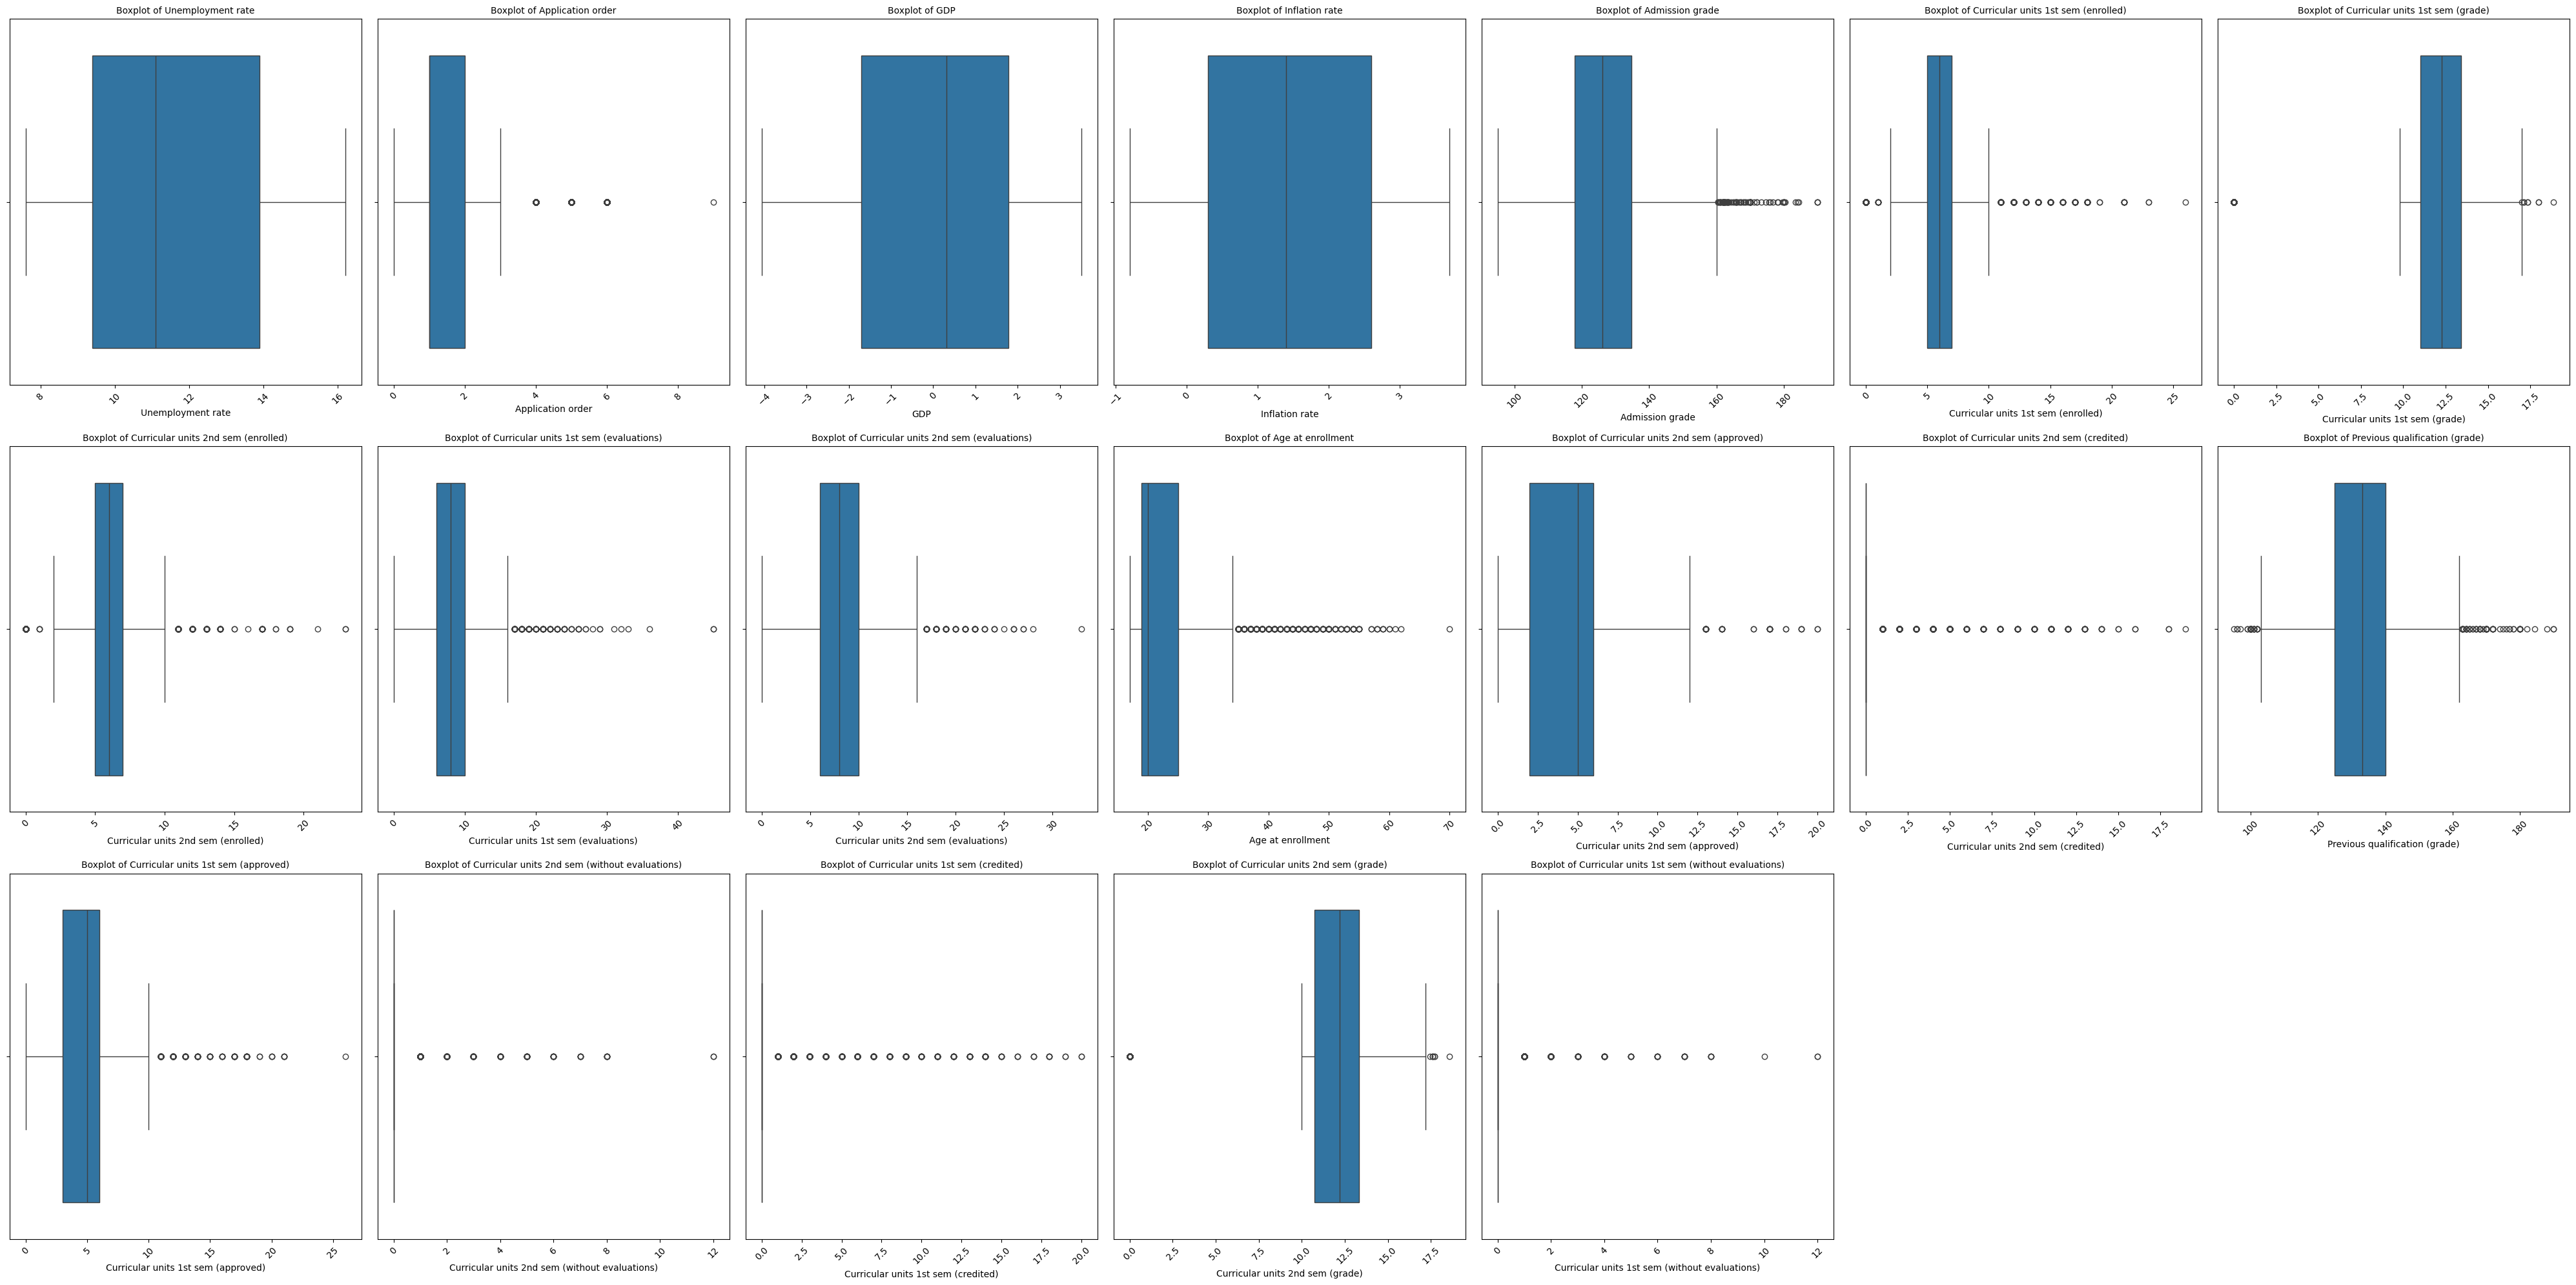

In [12]:
#Visualize numerical columns
fig, axes = plt.subplots(3, 7, figsize=(40, 20))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, 21):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<ipython-input-13-57ce9e86b57c>:13: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


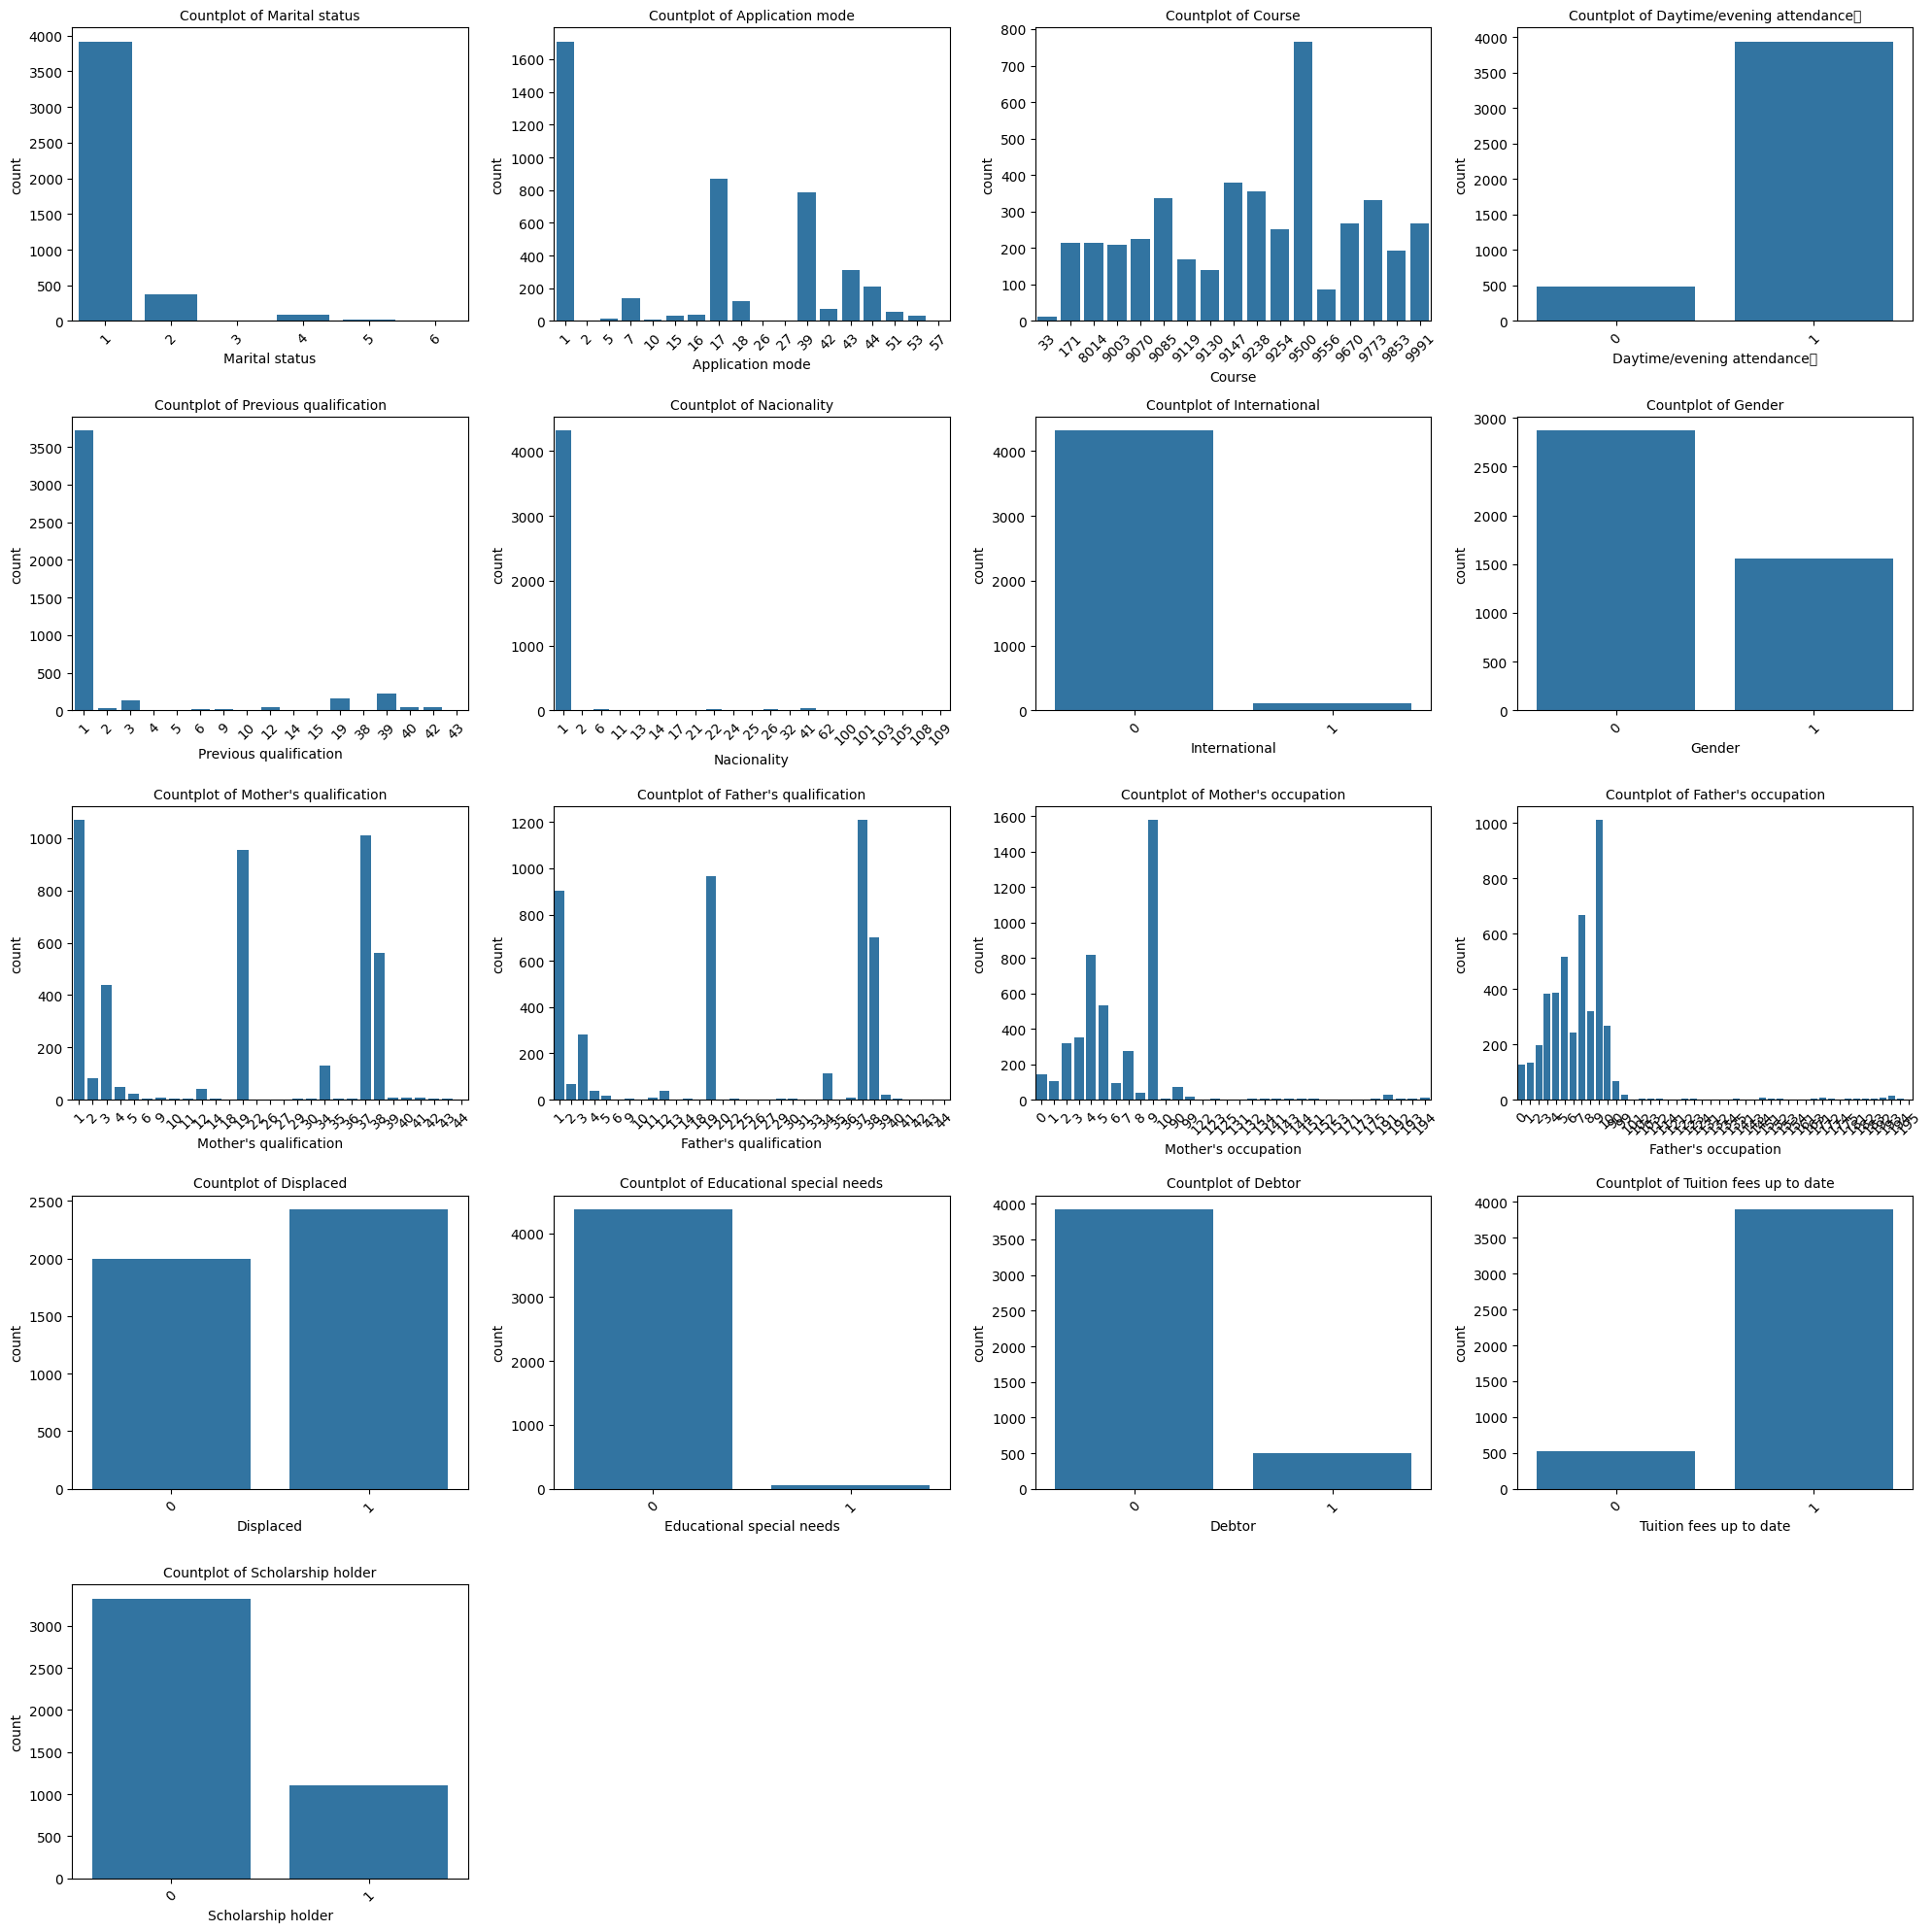

In [13]:
#Visualize categorical colums
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, 20):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

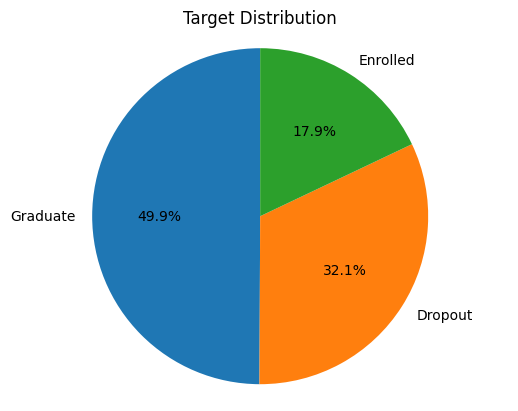

In [14]:
#Pie chart of target
fig, ax = plt.subplots()
ax.pie(df['Target'].value_counts(), labels=df['Target'].value_counts().index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Target Distribution')
plt.show()

##Decode dict

In [15]:
#Decode Dataframe for further visualization
mapping_dict = {
    "Marital status": {
        1: "Single",
        2: "Married",
        3: "Widower",
        4: "Divorced",
        5: "Facto union",
        6: "Legally separated"
    },
    "Application mode": {
        1: "1st phase - general contingent",
        2: "Ordinance No. 612/93",
        5: "1st phase - special contingent (Azores Island)",
        7: "Holders of other higher courses",
        10: "Ordinance No. 854-B/99",
        15: "International student (bachelor)",
        16: "1st phase - special contingent (Madeira Island)",
        17: "2nd phase - general contingent",
        18: "3rd phase - general contingent",
        26: "Ordinance No. 533-A/99, item b2) (Different Plan)",
        27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
        39: "Over 23 years old",
        42: "Transfer",
        43: "Change of course",
        44: "Technological specialization diploma holders",
        51: "Change of institution/course",
        53: "Short cycle diploma holders",
        57: "Change of institution/course (International)"
    },
    "Course": {
        33: "Biofuel Production Technologies",
        171: "Animation and Multimedia Design",
        8014: "Social Service (evening attendance)",
        9003: "Agronomy",
        9070: "Communication Design",
        9085: "Veterinary Nursing",
        9119: "Informatics Engineering",
        9130: "Equinculture",
        9147: "Management",
        9238: "Social Service",
        9254: "Tourism",
        9500: "Nursing",
        9556: "Oral Hygiene",
        9670: "Advertising and Marketing Management",
        9773: "Journalism and Communication",
        9853: "Basic Education",
        9991: "Management (evening attendance)"
    },
    "Daytime/evening attendance\t": {
        1: "Daytime", 0: "Evening"
    },
    "Previous qualification": {
        1: "Secondary education",
        2: "Higher education - bachelor's degree",
        3: "Higher education - degree",
        4: "Higher education - master's",
        5: "Higher education - doctorate",
        6: "Frequency of higher education",
        9: "12th year of schooling - not completed",
        10: "11th year of schooling - not completed",
        12: "Other - 11th year of schooling",
        14: "10th year of schooling",
        15: "10th year of schooling - not completed",
        19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
        38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
        39: "Technological specialization course",
        40: "Higher education - degree (1st cycle)",
        42: "Professional higher technical course",
        43: "Higher education - master (2nd cycle)"
    },
    "Nacionality": {
        1: "Portuguese", 2: "German", 6: "Spanish", 11: "Italian", 13: "Dutch",
        14: "English", 17: "Lithuanian", 21: "Angolan", 22: "Cape Verdean",
        24: "Guinean", 25: "Mozambican", 26: "Santomean", 32: "Turkish",
        41: "Brazilian", 62: "Romanian", 100: "Moldovan", 101: "Mexican",
        103: "Ukrainian", 105: "Russian", 108: "Cuban", 109: "Colombian"
    },
        "Mother's qualification": {
        1: "Secondary Education - 12th Year of Schooling or Eq.",
        2: "Higher Education - Bachelor's Degree",
        3: "Higher Education - Degree",
        4: "Higher Education - Master's",
        5: "Higher Education - Doctorate",
        6: "Frequency of Higher Education",
        9: "12th Year of Schooling - Not Completed",
        10: "11th Year of Schooling - Not Completed",
        11: "7th Year (Old)",
        12: "Other - 11th Year of Schooling",
        14: "10th Year of Schooling",
        18: "General Commerce Course",
        19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
        22: "Technical-professional course",
        26: "7th Year of Schooling",
        27: "2nd Cycle of General High School Course",
        29: "9th Year of Schooling - Not Completed",
        30: "8th Year of Schooling",
        34: "Unknown",
        35: "Can't Read or Write",
        36: "Can Read Without 4th Year of Schooling",
        37: "Basic Education 1st Cycle (4th/5th Year) or Eq.",
        38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Eq.",
        39: "Technological Specialization Course",
        40: "Higher Education - Degree (1st Cycle)",
        41: "Specialized Higher Studies Course",
        42: "Professional Higher Technical Course",
        43: "Higher Education - Master (2nd Cycle)",
        44: "Higher Education - Doctorate (3rd Cycle)"
    },
    "Father's qualification": {
        1: "Secondary Education - 12th Year of Schooling or Eq.",
        2: "Higher Education - Bachelor's Degree",
        3: "Higher Education - Degree",
        4: "Higher Education - Master's",
        5: "Higher Education - Doctorate",
        6: "Frequency of Higher Education",
        9: "12th Year of Schooling - Not Completed",
        10: "11th Year of Schooling - Not Completed",
        11: "7th Year (Old)",
        12: "Other - 11th Year of Schooling",
        13: "2nd Year Complementary High School Course",
        14: "10th Year of Schooling",
        18: "General Commerce Course",
        19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
        20: "Complementary High School Course",
        22: "Technical-professional course",
        25: "Complementary High School Course - Not Completed",
        26: "7th Year of Schooling",
        27: "2nd Cycle of General High School Course",
        29: "9th Year of Schooling - Not Completed",
        30: "8th Year of Schooling",
        31: "General Course of Administration and Commerce",
        33: "Supplementary Accounting and Administration",
        34: "Unknown",
        35: "Can't Read or Write",
        36: "Can Read Without 4th Year of Schooling",
        37: "Basic Education 1st Cycle (4th/5th Year) or Eq.",
        38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Eq.",
        39: "Technological Specialization Course",
        40: "Higher Education - Degree (1st Cycle)",
        41: "Specialized Higher Studies Course",
        42: "Professional Higher Technical Course",
        43: "Higher Education - Master (2nd Cycle)",
        44: "Higher Education - Doctorate (3rd Cycle)"
    },
    "Mother's occupation": {
        0: "Student", 1: "Legislative Power Representatives",
        2: "Intellectual and Scientific Specialists",
        3: "Intermediate Level Technicians and Professions",
        4: "Administrative Staff", 5: "Personal Services, Security Workers",
        6: "Skilled Workers in Agriculture", 7: "Skilled Industry Workers",
        8: "Machine Operators", 9: "Unskilled Workers",
        10: "Armed Forces Professions", 90: "Other Situation", 99: "(blank)",
        122: "Health Professionals", 123: "Teachers",
        125: "ICT Specialists", 131: "Intermediate Science Technicians",
        132: "Health Technicians", 134: "Legal, Social Services Technicians",
        141: "Office Workers", 143: "Data and Financial Operators",
        144: "Administrative Support", 151: "Personal Service Workers",
        152: "Sellers", 153: "Personal Care Workers",
        171: "Skilled Construction Workers",
        173: "Skilled Precision Workers", 175: "Food Processing Workers",
        191: "Cleaning Workers", 192: "Unskilled Agricultural Workers",
        193: "Unskilled Industry Workers", 194: "Meal Preparation Assistants"
    },
    "Father's occupation": {
        0: "Student", 1: "Legislative Power Representatives",
        2: "Intellectual and Scientific Specialists",
        3: "Intermediate Level Technicians and Professions",
        4: "Administrative Staff", 5: "Personal Services, Security Workers",
        6: "Skilled Workers in Agriculture", 7: "Skilled Industry Workers",
        8: "Machine Operators", 9: "Unskilled Workers",
        10: "Armed Forces Professions", 90: "Other Situation", 99: "(blank)",
        101: "Armed Forces Officers", 102: "Armed Forces Sergeants",
        103: "Other Armed Forces Personnel", 112: "Administrative Directors",
        114: "Services Directors", 121: "Science and Engineering Specialists",
        122: "Health Professionals", 123: "Teachers", 124: "Finance Specialists",
        131: "Intermediate Science Technicians", 132: "Health Technicians",
        134: "Legal, Social Services Technicians", 135: "ICT Technicians",
        141: "Office Workers", 143: "Data and Financial Operators",
        144: "Administrative Support", 151: "Personal Service Workers",
        152: "Sellers", 153: "Personal Care Workers",
        154: "Security Services Personnel", 161: "Skilled Agricultural Workers",
        163: "Skilled Farmers, Fishermen", 171: "Skilled Construction Workers",
        172: "Skilled Metallurgy Workers", 174: "Skilled Electricians",
        175: "Food Processing Workers", 181: "Machine Operators",
        182: "Assembly Workers", 183: "Vehicle Drivers",
        192: "Unskilled Agricultural Workers", 193: "Unskilled Industry Workers",
        194: "Meal Preparation Assistants", 195: "Street Vendors"
    },
    "Displaced": {
        0: "Not displaced", 1: "Displaced"
    },
    "Educational special needs": {
        0: "No special needs", 1: "Has special needs"
    },
    "Debtor": {
        0: "Not a debtor", 1: "Debtor"
    },
    "Tuition fees up to date": {
        0: "Late paid", 1: "Ontime paid"
    },
    "Gender": {
        0: "Female", 1: "Male"
    },
    "Scholarship holder": {
        0: "Not a scholarship holder", 1: "Scholarship holder"
    },
    "International": {
        0: "Domestic", 1: "International"
    }
}

##Decode mapping

In [16]:
# Tạo bản sao của df để thực hiện thay thế giá trị
df_decode = df.copy()

# Áp dụng mapping cho từng cột dựa trên bảng ánh xạ
for col, mapping in mapping_dict.items():
    df_decode[col] = df_decode[col].map(mapping)

# Hiển thị DataFrame sau khi thay thế
df_decode.head()

Marital status                  Application mode  Application order  \
0         Single    2nd phase - general contingent                  5   
1         Single  International student (bachelor)                  1   
2         Single    1st phase - general contingent                  5   
3         Single    2nd phase - general contingent                  2   
4        Married                 Over 23 years old                  1   

                                Course Daytime/evening attendance\t  \
0      Animation and Multimedia Design                      Daytime   
1                              Tourism                      Daytime   
2                 Communication Design                      Daytime   
3         Journalism and Communication                      Daytime   
4  Social Service (evening attendance)                      Evening   

  Previous qualification  Previous qualification (grade) Nacionality  \
0    Secondary education                           122.0  Portuguese   
1    Secondary education                           160.0  Portuguese   
2    Secondary education                           122.0  Portuguese   
3    Secondary education                           122.0  Portuguese   
4    Secondary education                           100.0  Portuguese   

                              Mother's qualification  \
0  Basic Education 3rd Cycle (9th/10th/11th Year)...   
1  Secondary Education - 12th Year of Schooling o...   
2    Basic Education 1st Cycle (4th/5th Year) or Eq.   
3  Basic Education 2nd Cycle (6th/7th/8th Year) o...   
4    Basic Education 1st Cycle (4th/5th Year) or Eq.   

                              Father's qualification  \
0                     Other - 11th Year of Schooling   
1                          Higher Education - Degree   
2    Basic Education 1st Cycle (4th/5th Year) or Eq.   
3    Basic Education 1st Cycle (4th/5th Year) or Eq.   
4  Basic Education 2nd Cycle (6th/7th/8th Year) o...   

                              Mother's occupation  \
0             Personal Services, Security Workers   
1  Intermediate Level Technicians and Professions   
2                               Unskilled Workers   
3             Personal Services, Security Workers   
4                               Unskilled Workers   

                              Father's occupation  Admission grade  \
0                               Unskilled Workers            127.3   
1  Intermediate Level Technicians and Professions            142.5   
2                               Unskilled Workers            124.8   
3  Intermediate Level Technicians and Professions            119.6   
4                               Unskilled Workers            141.5   

       Displaced Educational special needs        Debtor  \
0      Displaced          No special needs  Not a debtor   
1      Displaced          No special needs  Not a debtor   
2      Displaced          No special needs  Not a debtor   
3      Displaced          No special needs  Not a debtor   
4  Not displaced          No special needs  Not a debtor   

  Tuition fees up to date  Gender        Scholarship holder  \
0             Ontime paid    Male  Not a scholarship holder   
1               Late paid    Male  Not a scholarship holder   
2               Late paid    Male  Not a scholarship holder   
3             Ontime paid  Female  Not a scholarship holder   
4             Ontime paid  Female  Not a scholarship holder   

   Age at enrollment International  Curricular units 1st sem (credited)  \
0                 20      Domestic                                    0   
1                 19      Domestic                                    0   
2                 19      Domestic                                    0   
3                 20      Domestic                                    0   
4                 45      Domestic                                    0   

   Curricular units 1st sem (enrolled)  \
0                                    0   
1             

In [17]:
df_decode.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Target                                            0
dtype: int64

In [18]:
# features grouping
demo_cols = ["Marital status", "Nacionality", "International", "Gender",
            "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation",
             "Displaced", "Debtor", "Age at enrollment"]
academic_cols = ["Application mode", "Application order", "Course", "Admission grade",
                 "Previous qualification", "Previous qualification (grade)",
                 "Educational special needs", "Tuition fees up to date", "Daytime/evening attendance\t", "Scholarship holder"]
socialfactor_cols = ["GDP", "Inflation rate", "Unemployment rate"]
performance_cols = [col for col in df_decode.columns if col not in demo_cols + academic_cols + socialfactor_cols + ["Target"]]

In [19]:
print(len(demo_cols))
print(len(academic_cols))
print(len(socialfactor_cols))
print(len(performance_cols))

11
10
3
12


## Correlation features - target
- features by target visualization
- heatmap.corr()

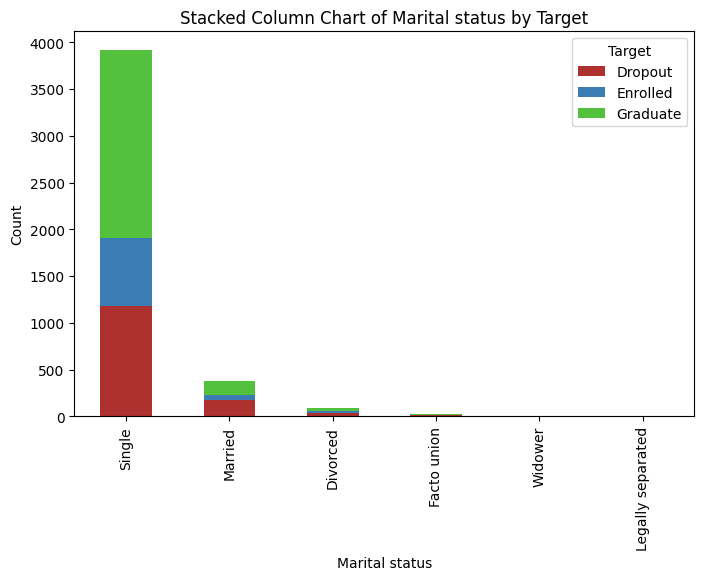

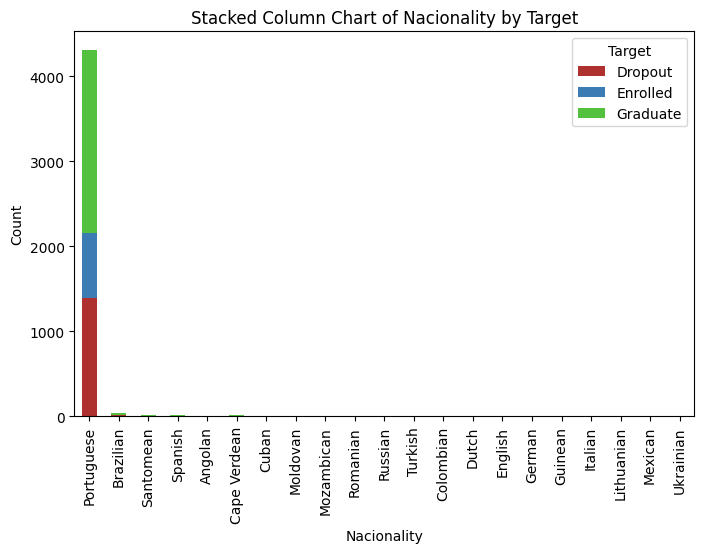

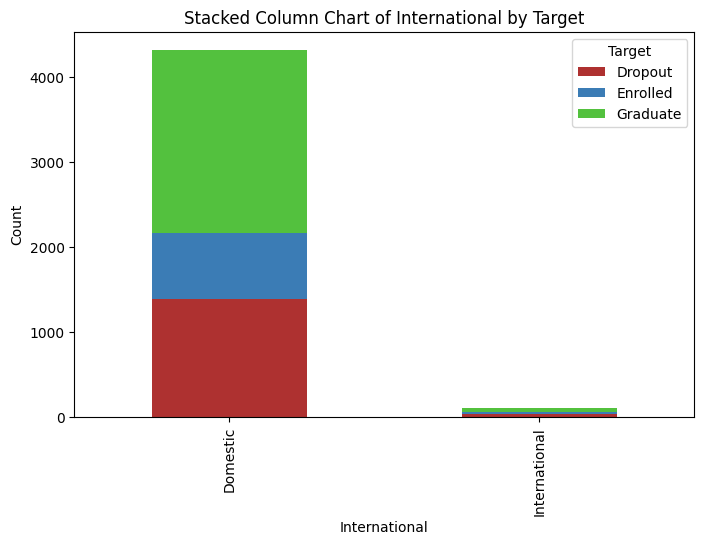

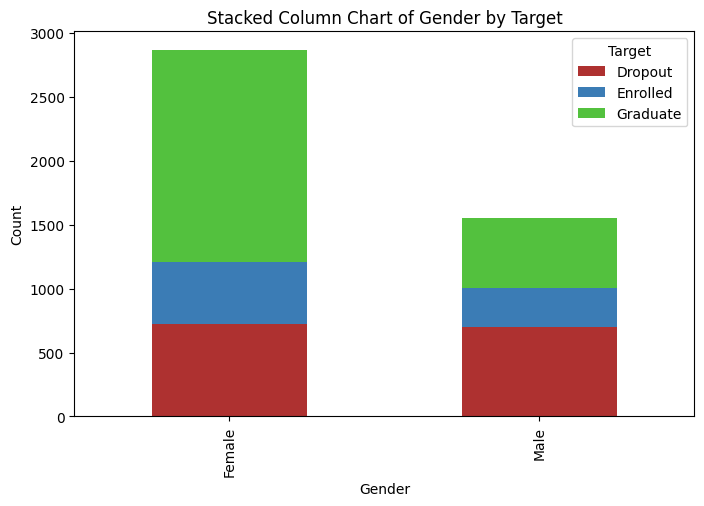

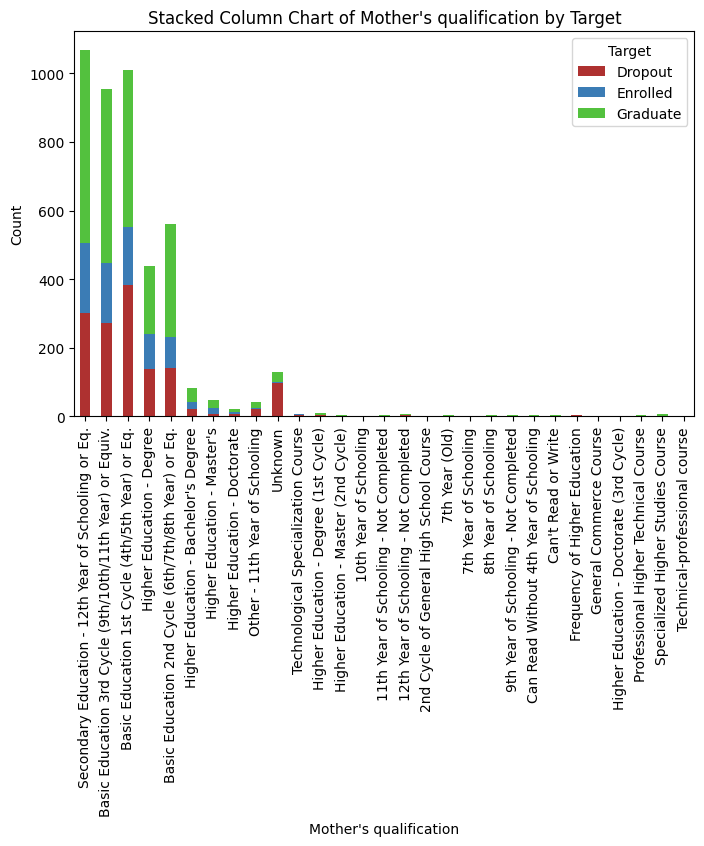

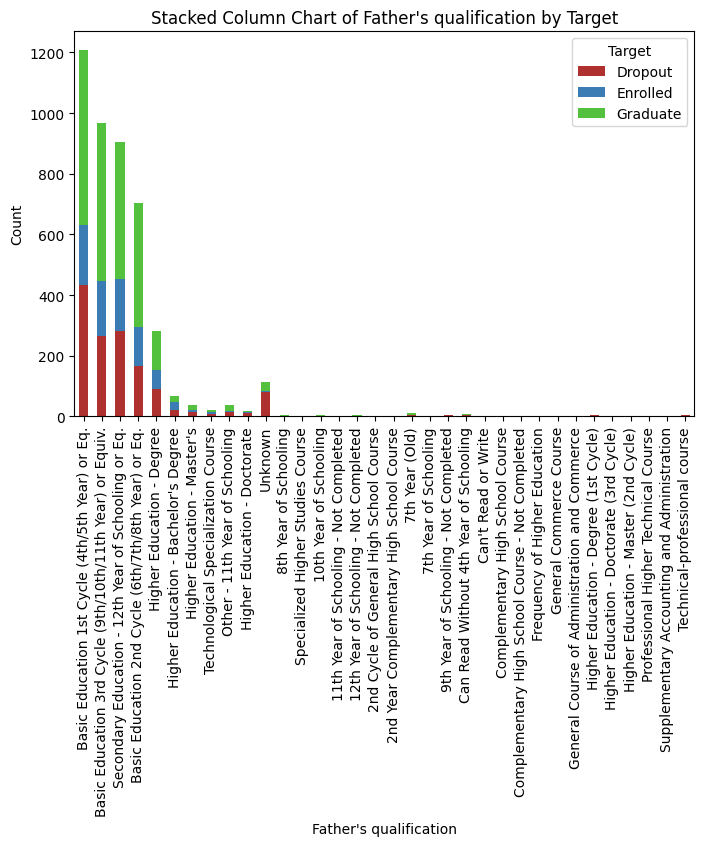

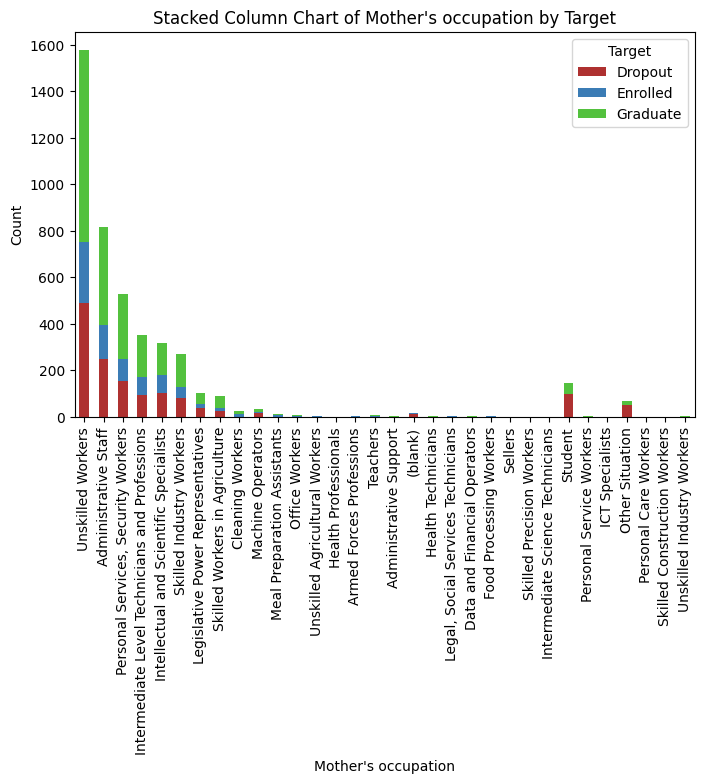

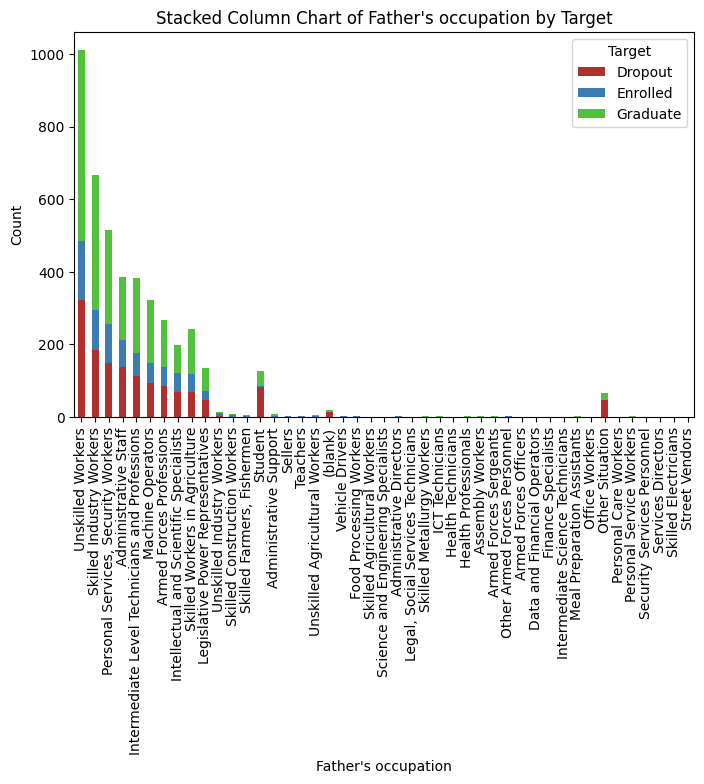

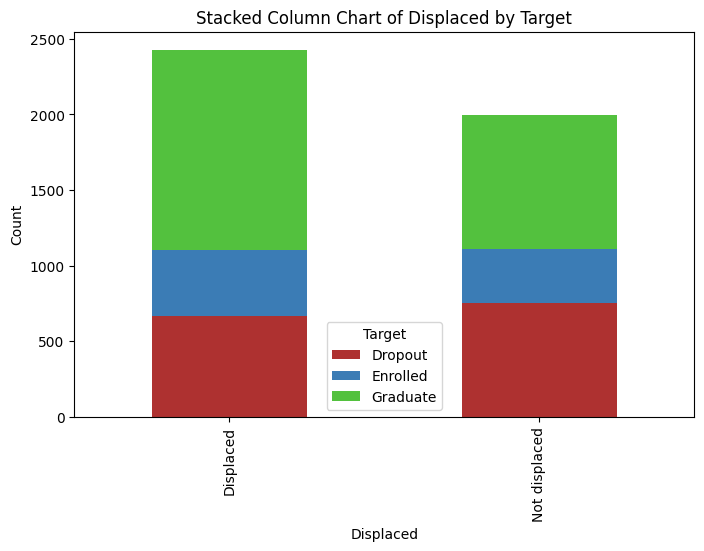

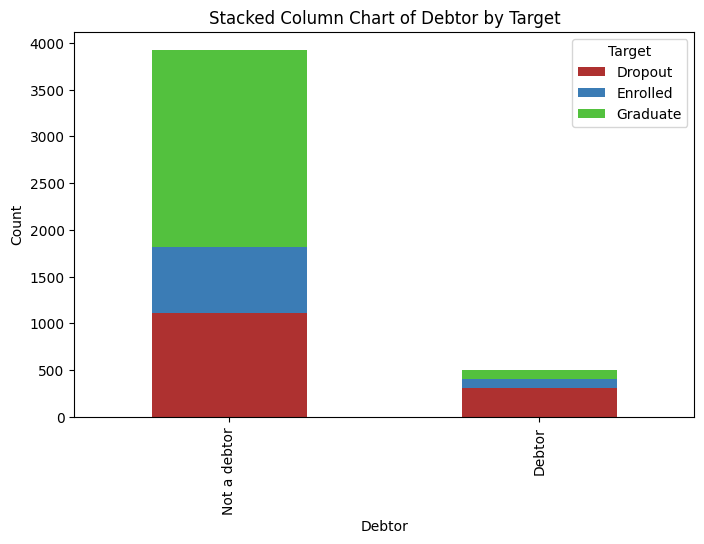

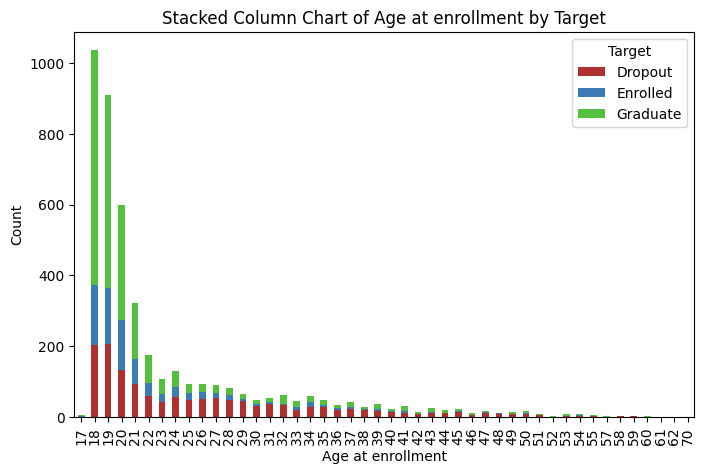

In [20]:
# Draw stacked column charts with hue = Target for cat_cols in demo_cols
for col in demo_cols:
      data = df_decode.groupby([col, 'Target']).size().unstack()
      if col in cat_cols:
        data = data.sort_values(by=data.columns[1], ascending=False)
      fig, ax = plt.subplots(figsize=(8, 5))
      data.plot(kind='bar', stacked=True, ax=ax, color=['#ae3130', '#3b7cb5','#53c13e'])
      ax.set_xlabel(col)
      ax.set_ylabel('Count')
      ax.set_title(f'Stacked Column Chart of {col} by Target')
      plt.show()



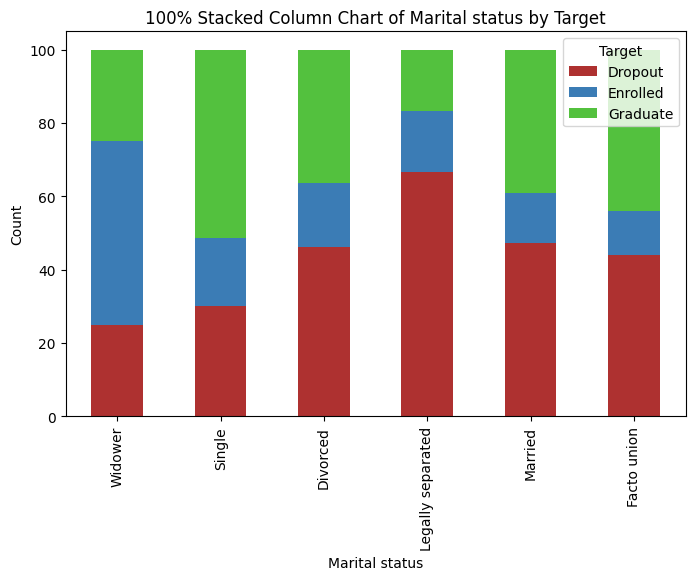

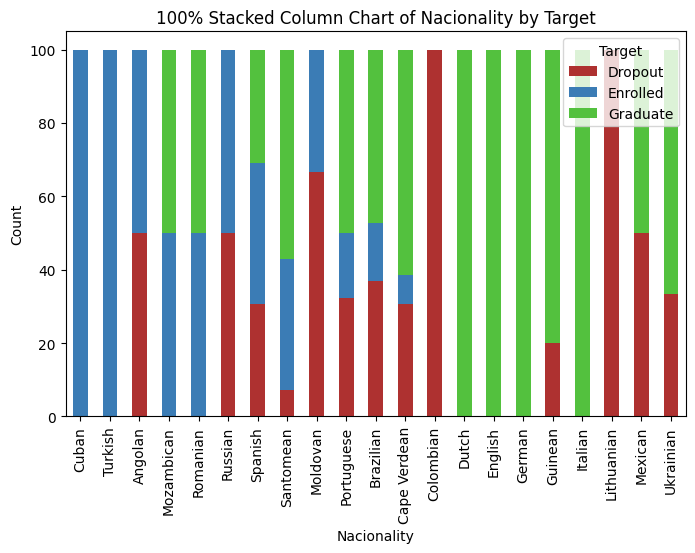

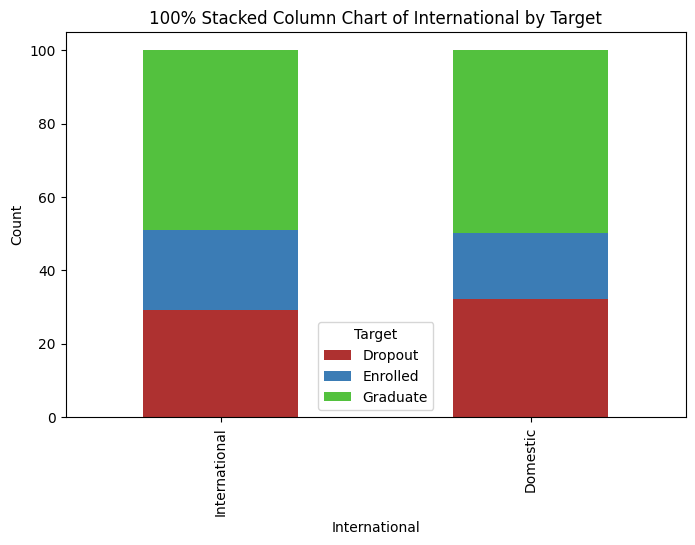

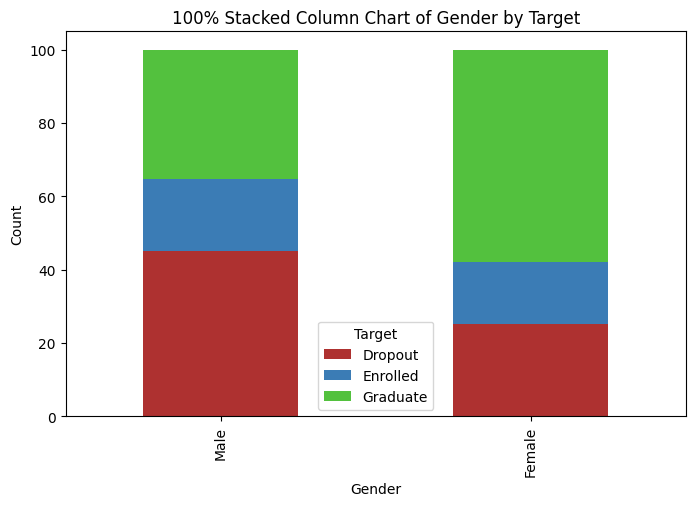

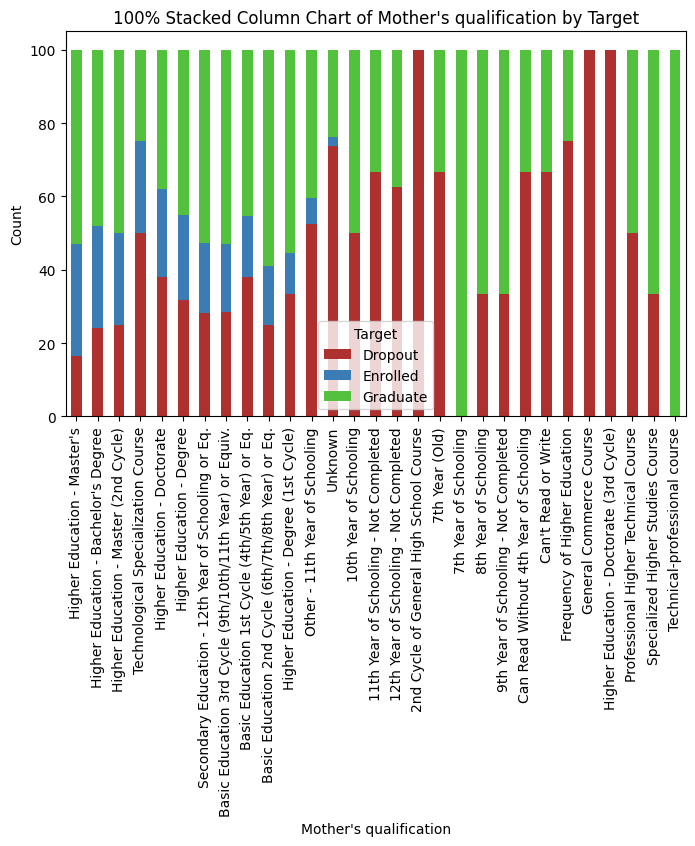

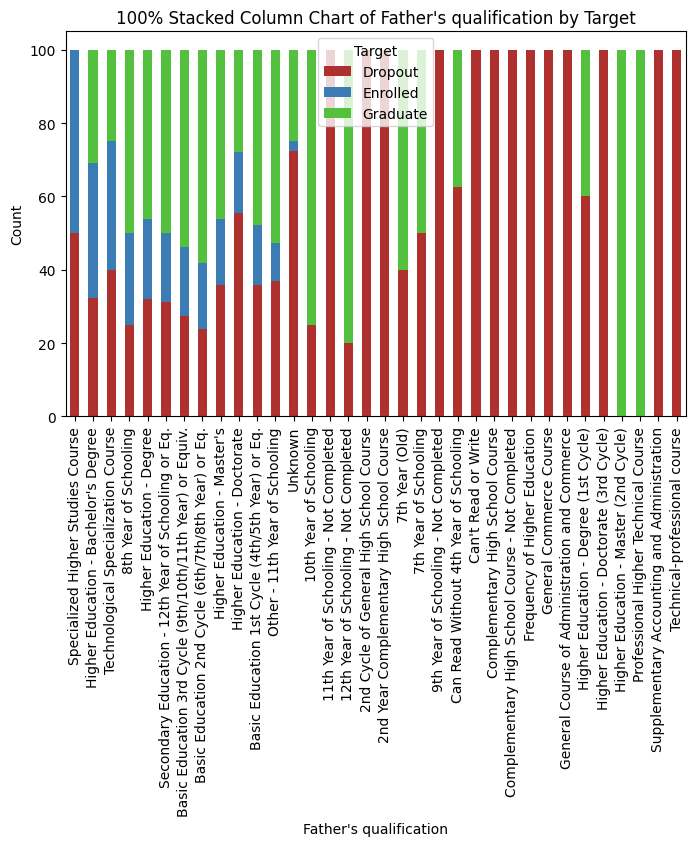

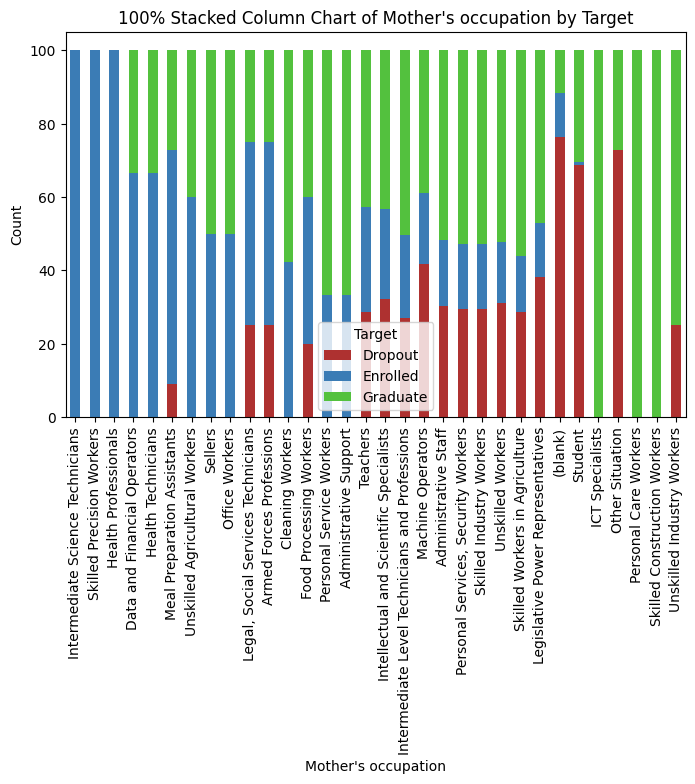

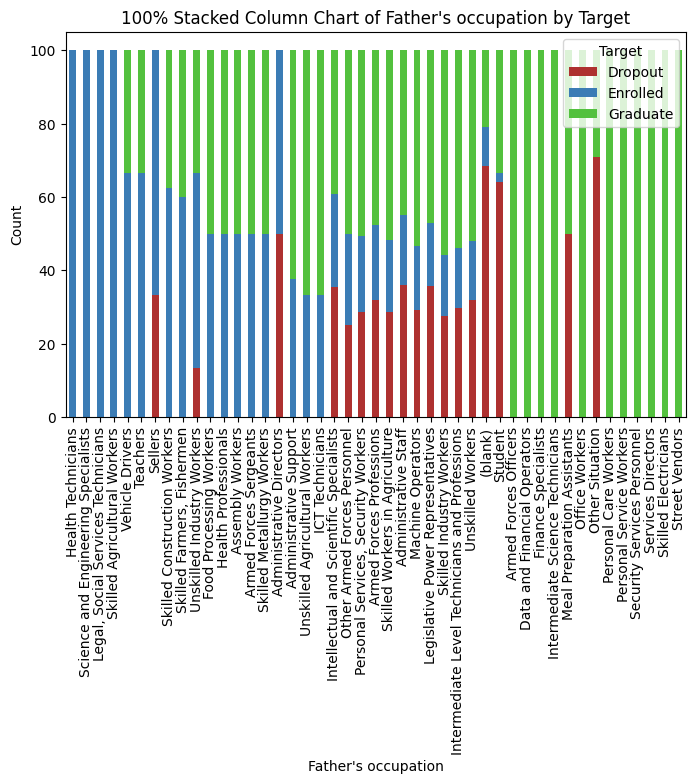

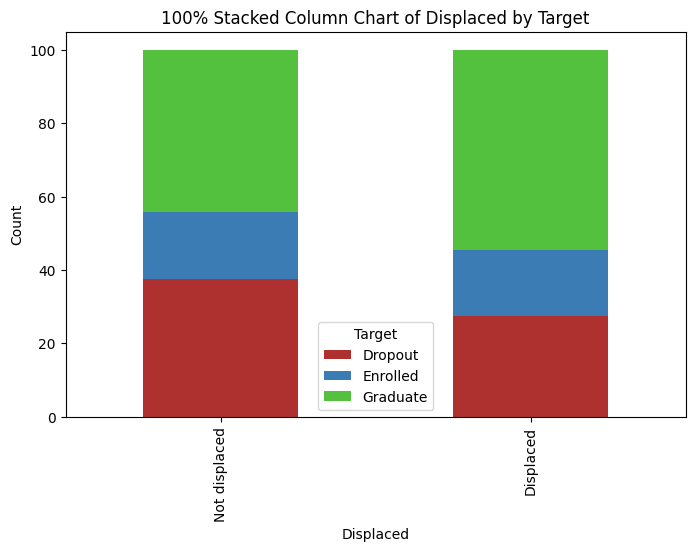

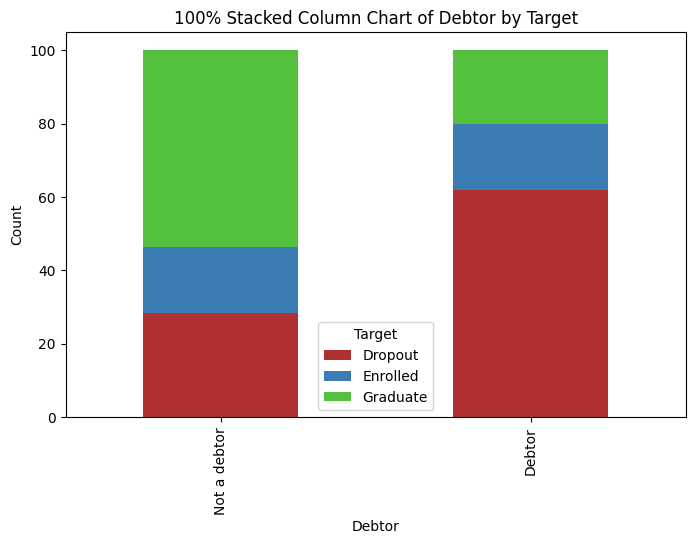

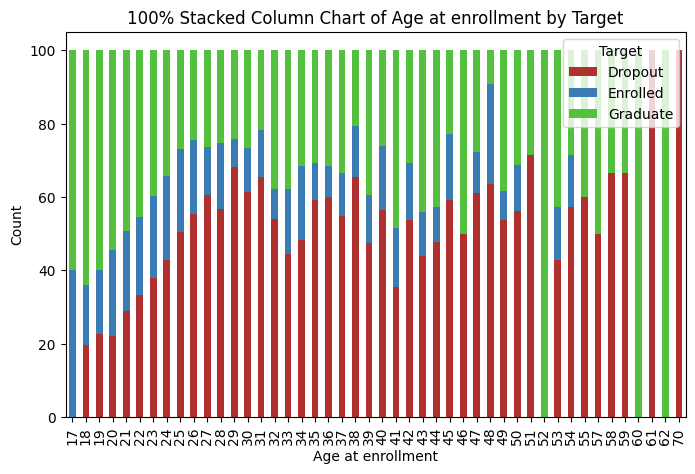

In [21]:
# Draw 100% stacked column charts with hue = Target for cat_cols in demo_cols
for col in demo_cols:
      data = df_decode.groupby([col, 'Target']).size().unstack()
      data_percent = data.div(data.sum(axis=1), axis=0) * 100
      if col in cat_cols:
        data_percent = data_percent.sort_values(by=data.columns[1], ascending=False)
      fig, ax = plt.subplots(figsize=(8, 5))
      data_percent.plot(kind='bar', stacked=True, ax=ax, color=['#ae3130', '#3b7cb5','#53c13e'])
      ax.set_xlabel(col)
      ax.set_ylabel('Count')
      ax.set_title(f'100% Stacked Column Chart of {col} by Target')
      plt.show()

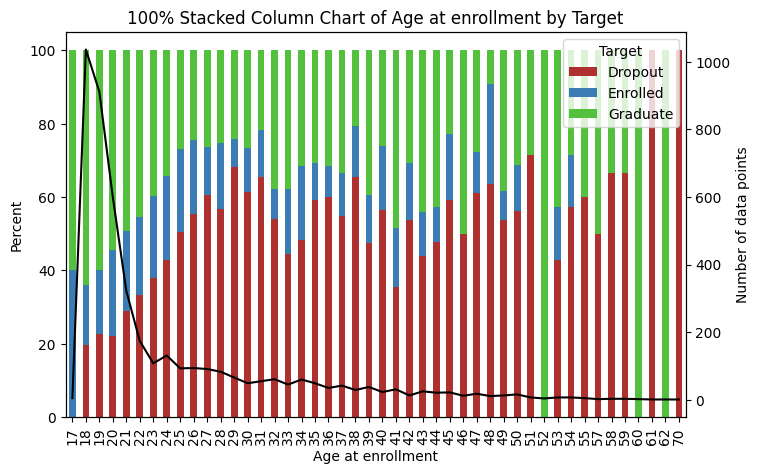

In [22]:
data_age = df_decode.groupby(['Age at enrollment', 'Target']).size().unstack()
data_age_percent = data_age.div(data_age.sum(axis=1), axis=0) * 100
data_age_percent = data_age_percent.sort_values(by=data_age_percent.columns[1], ascending=False)

# Sort data_age_percent by age
data_age_percent = data_age_percent.sort_index()

fig, ax = plt.subplots(figsize=(8, 5))
data_age_percent.plot(kind='bar', stacked=True, ax=ax, color=['#ae3130', '#3b7cb5','#53c13e'])

ax2 = ax.twinx()
age_counts = df_decode['Age at enrollment'].value_counts()
age_counts = age_counts.reindex(data_age_percent.index)
sns.lineplot(x=range(len(age_counts)), y=age_counts.values, color='black', ax=ax2)

ax.set_xlabel('Age at enrollment')
ax.set_ylabel('Percent')
ax2.set_ylabel('Number of data points')
ax.set_title('100% Stacked Column Chart of Age at enrollment by Target')

ax2.set_xticks(range(len(data_age_percent.index)))
ax2.set_xticklabels(data_age_percent.index)

plt.show()

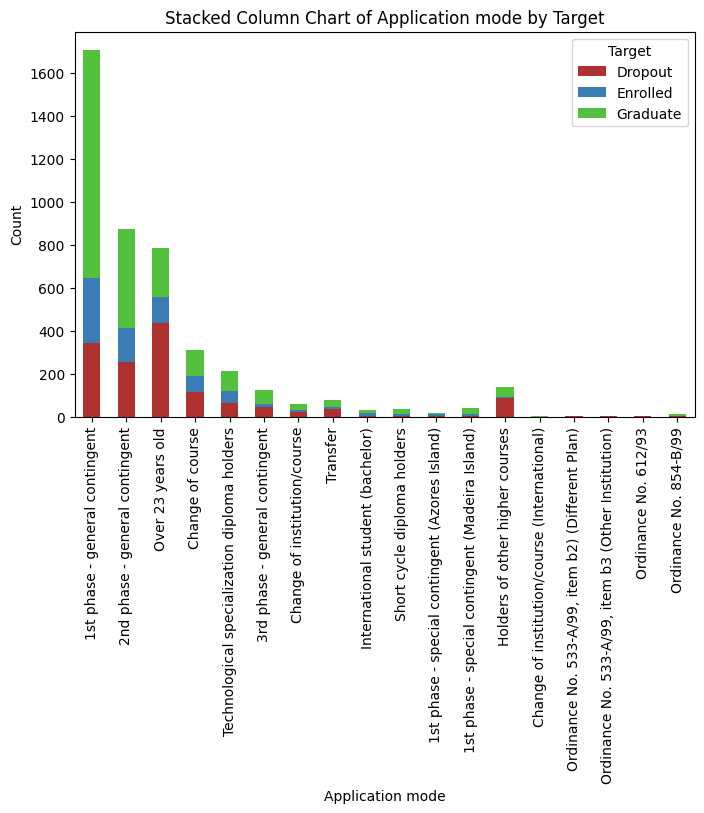

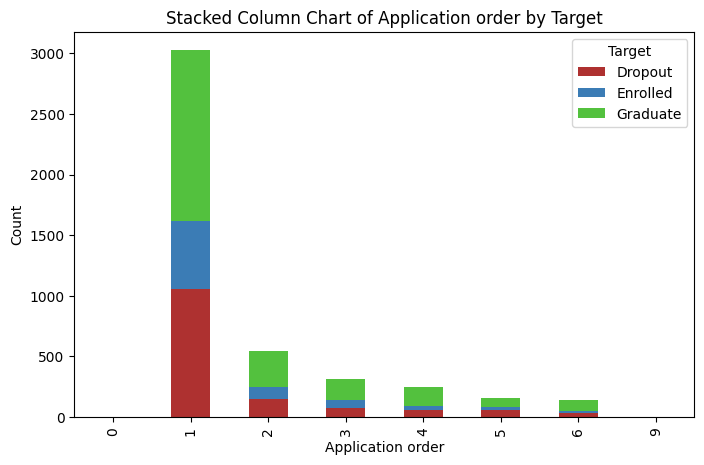

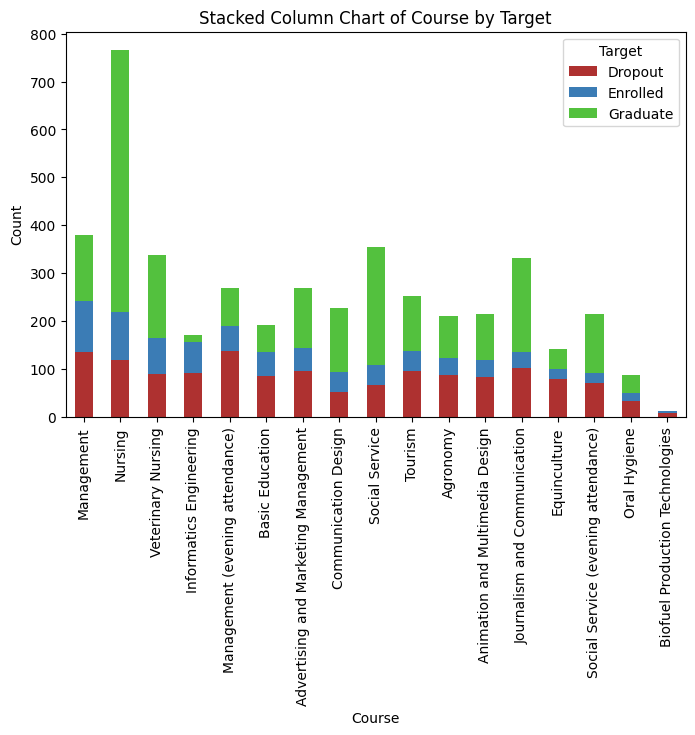

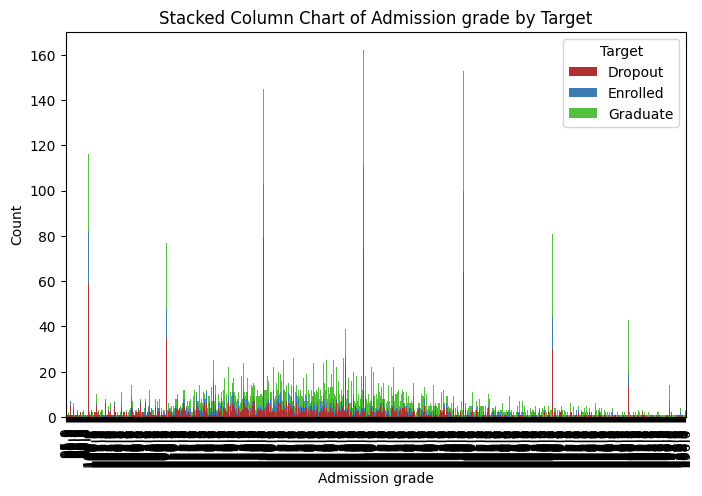

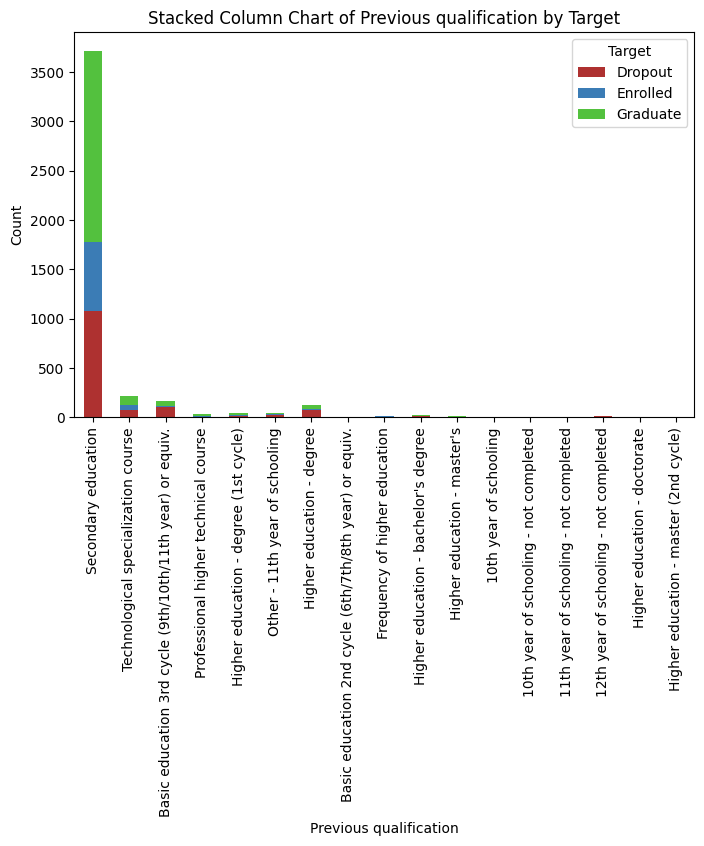

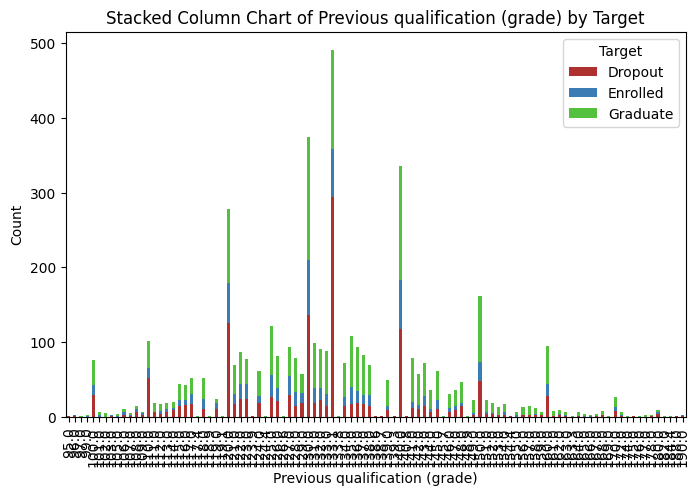

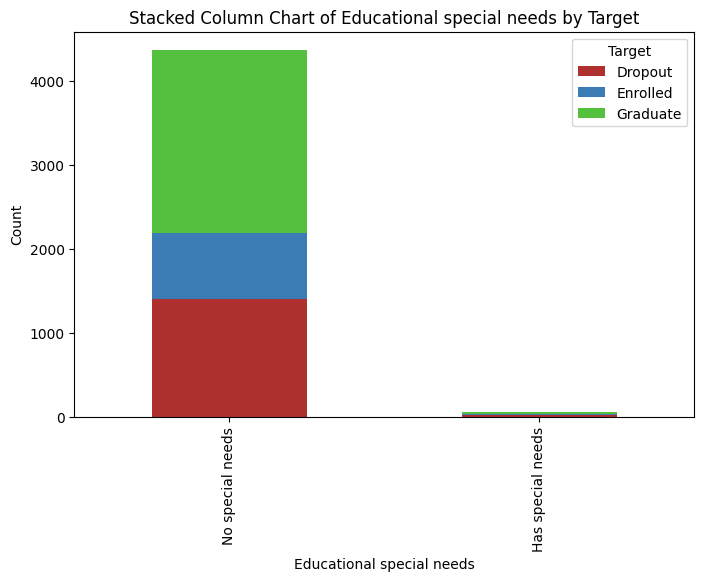

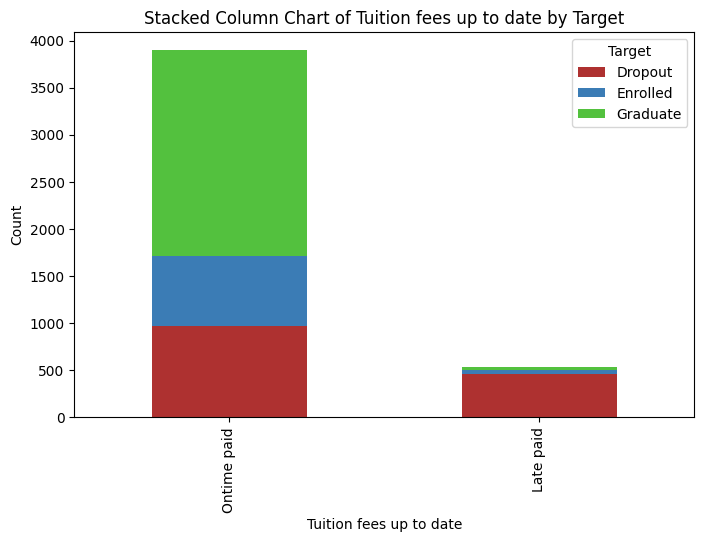

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


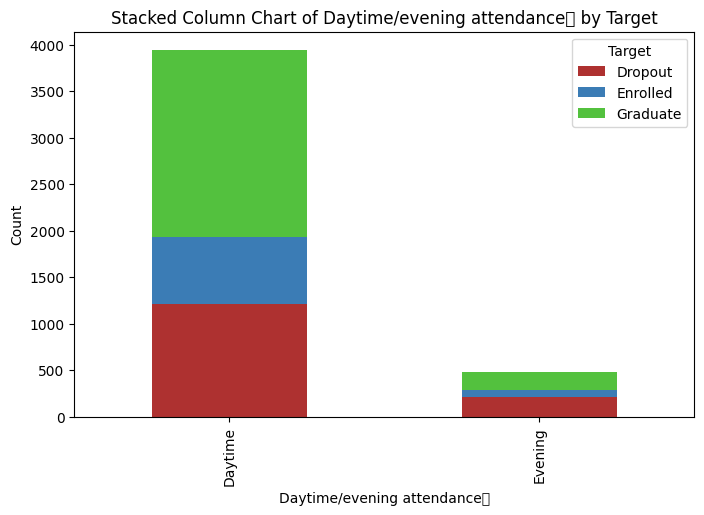

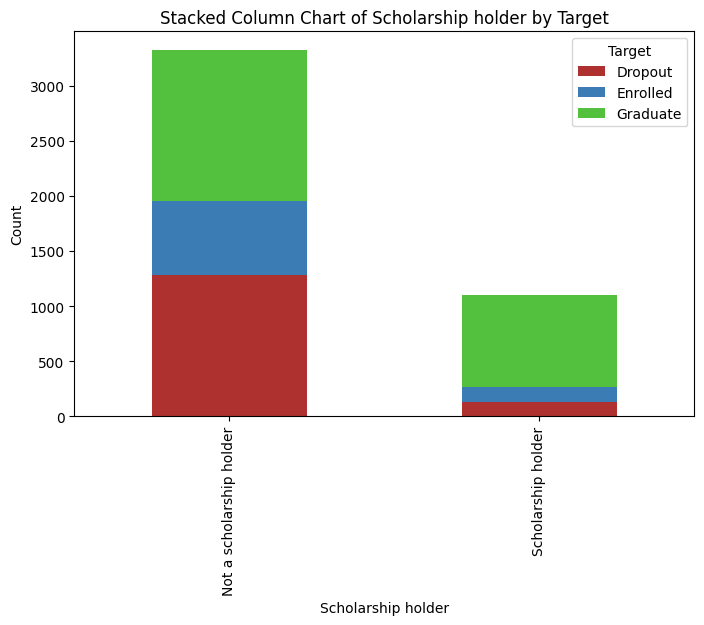

In [23]:
# Draw stacked column charts with hue = Target for cat_cols in academic_cols
for col in academic_cols:
      data = df_decode.groupby([col, 'Target']).size().unstack()
      if col in cat_cols:
        data = data.sort_values(by=data.columns[1], ascending=False)
      fig, ax = plt.subplots(figsize=(8, 5))
      data.plot(kind='bar', stacked=True, ax=ax, color=['#ae3130', '#3b7cb5','#53c13e'])
      ax.set_xlabel(col)
      ax.set_ylabel('Count')
      ax.set_title(f'Stacked Column Chart of {col} by Target')
      plt.show()

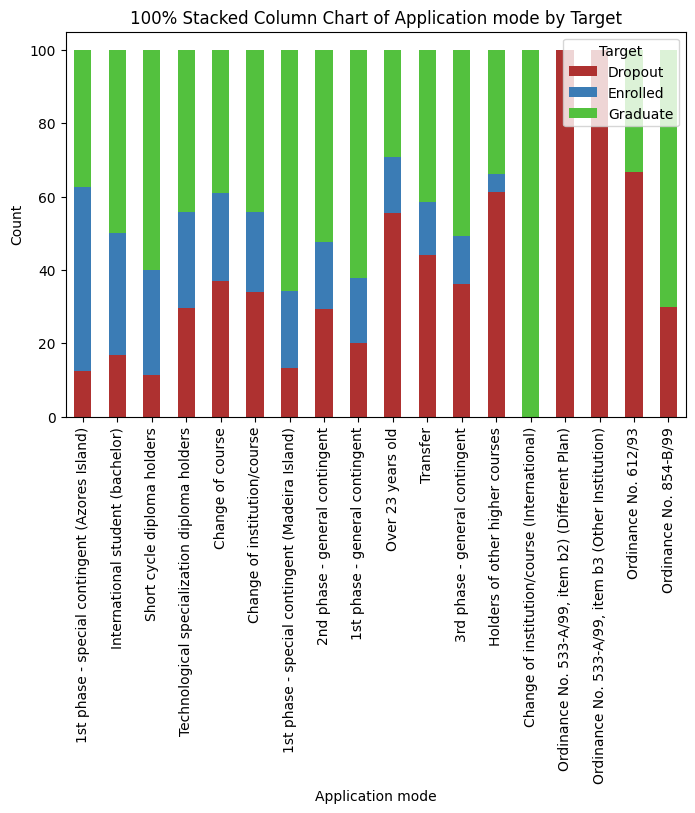

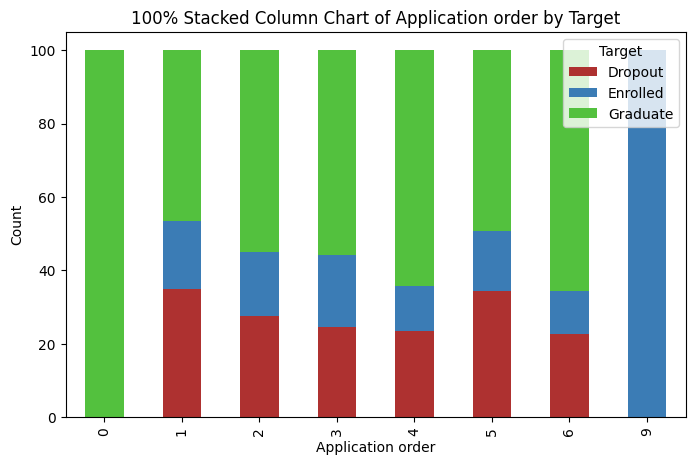

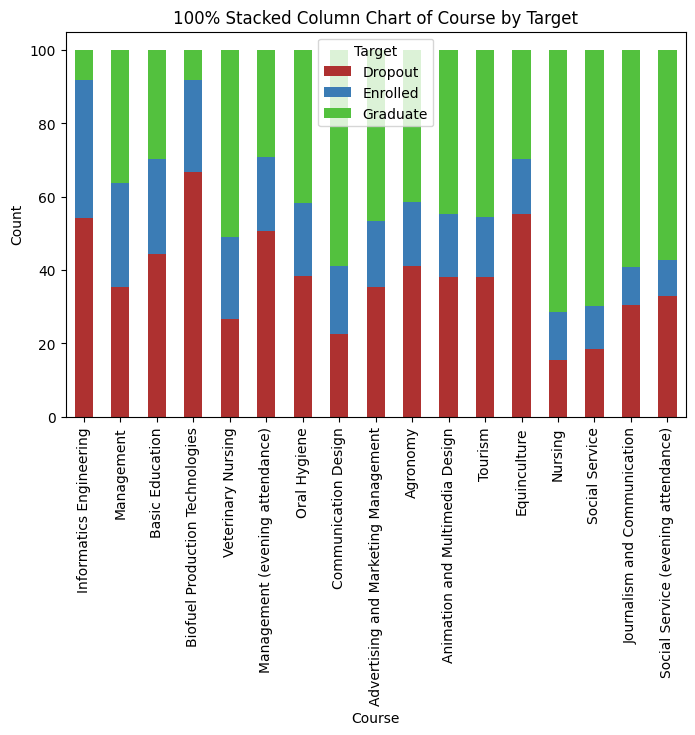

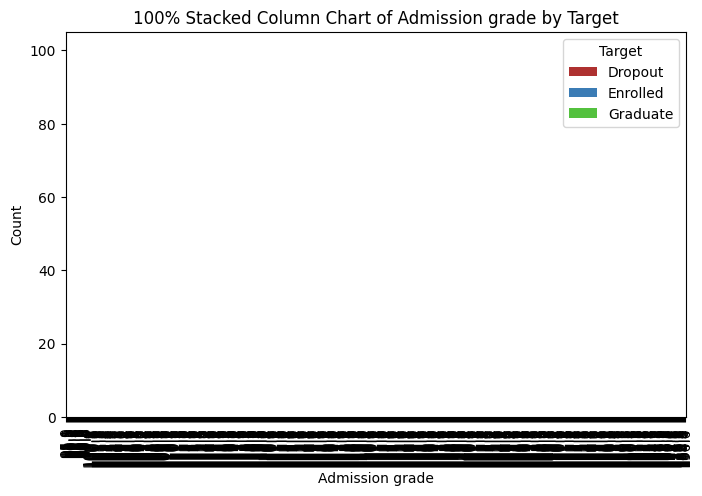

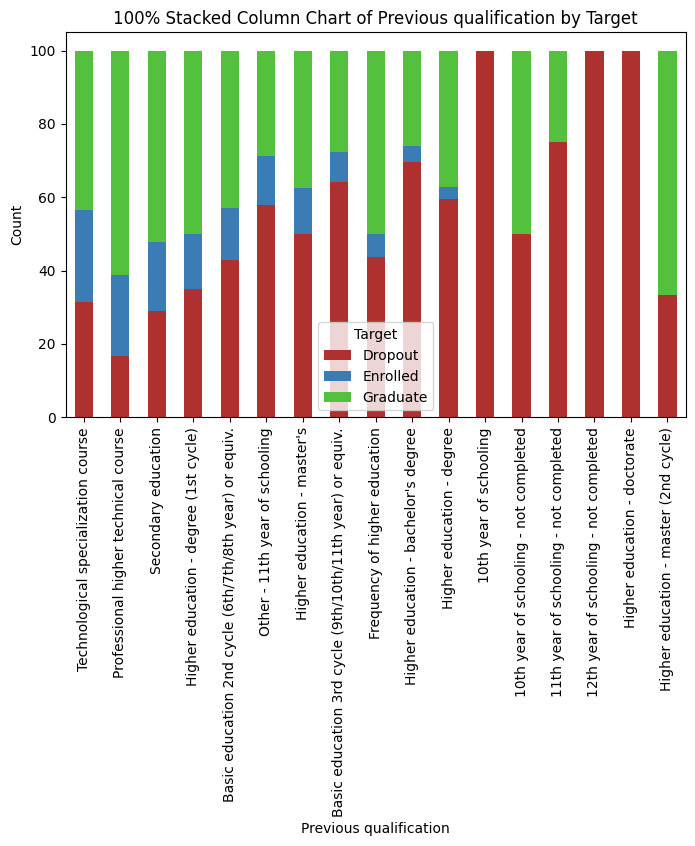

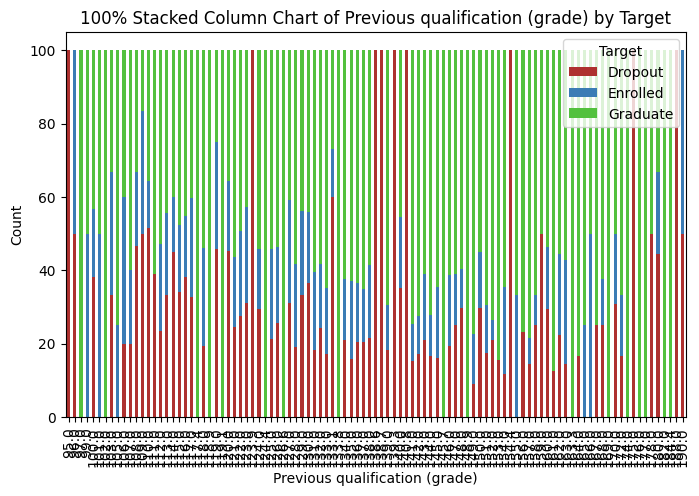

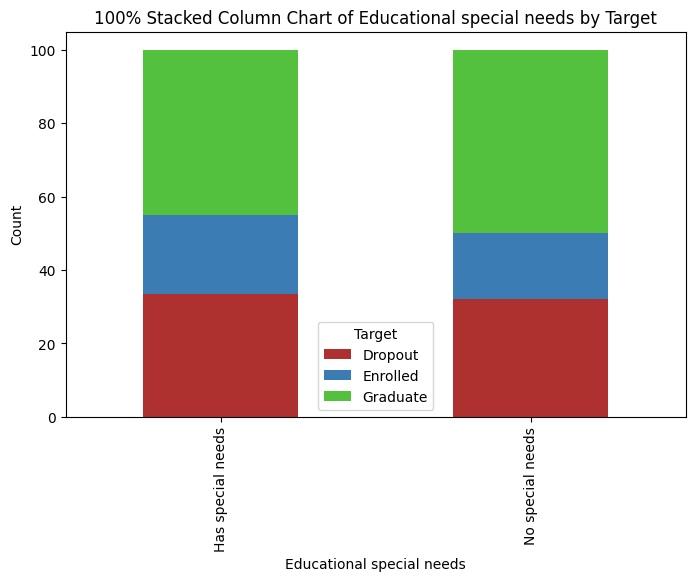

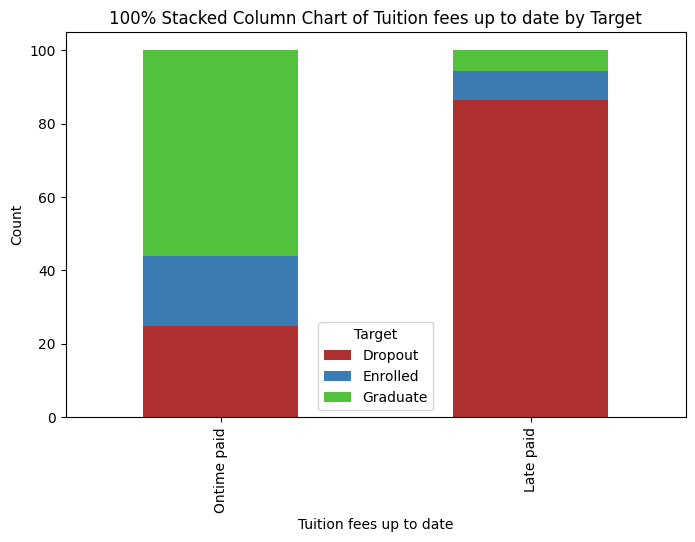

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


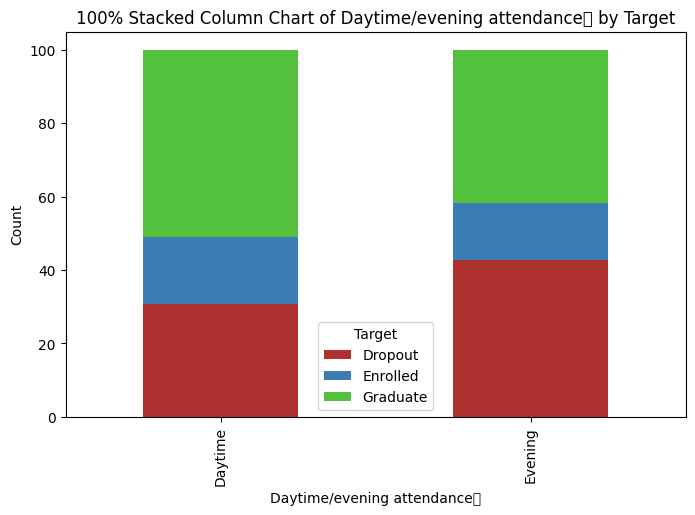

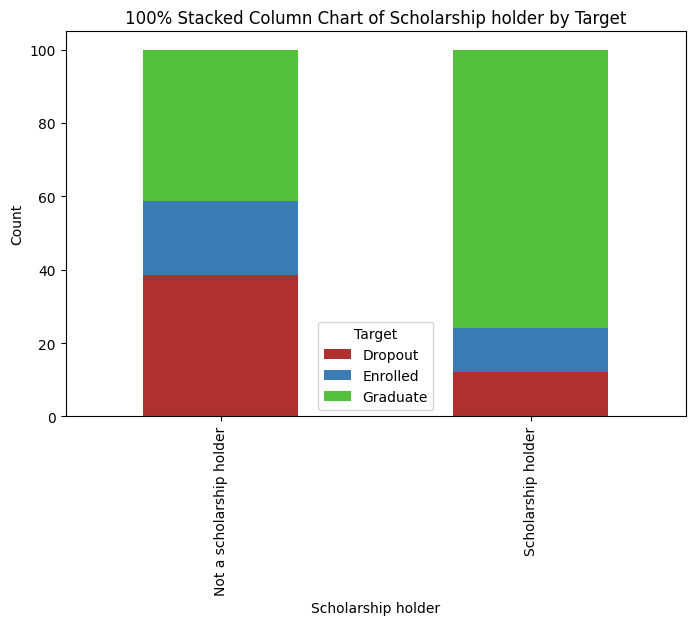

In [24]:
# Draw stacked column charts with hue = Target for cat_cols in academic_cols
for col in academic_cols:
      data = df_decode.groupby([col, 'Target']).size().unstack()
      data_percent = data.div(data.sum(axis=1), axis=0) * 100
      if col in cat_cols:
        data_percent = data_percent.sort_values(by=data.columns[1], ascending=False)
      fig, ax = plt.subplots(figsize=(8, 5))
      data_percent.plot(kind='bar', stacked=True, ax=ax, color=['#ae3130', '#3b7cb5','#53c13e'])
      ax.set_xlabel(col)
      ax.set_ylabel('Count')
      ax.set_title(f'100% Stacked Column Chart of {col} by Target')
      plt.show()

<Axes: xlabel='Previous qualification (grade)', ylabel='Admission grade'>

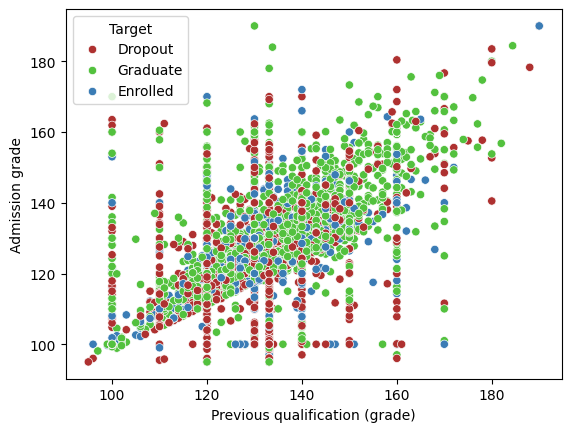

In [25]:
fig, ax = plt.subplots()
sns.scatterplot(data=df_decode, x='Previous qualification (grade)', y='Admission grade', hue='Target', ax=ax, palette={"Dropout":'#ae3130', "Enrolled":'#3b7cb5',"Graduate":'#53c13e'})

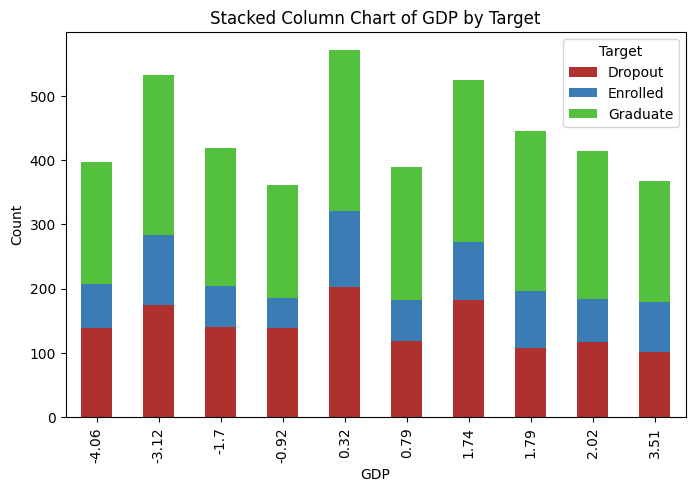

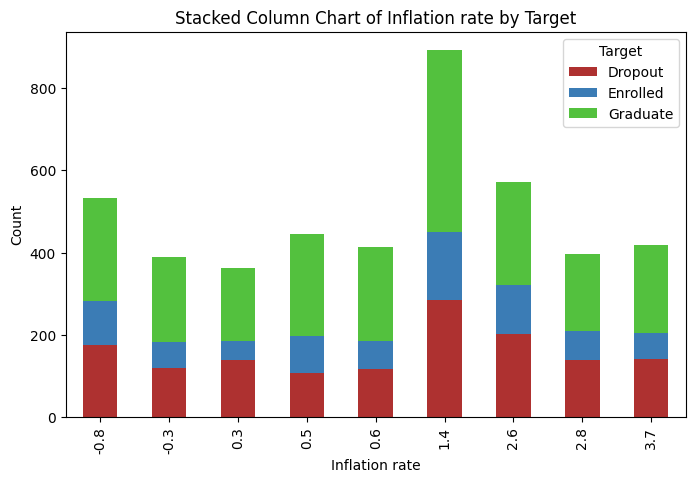

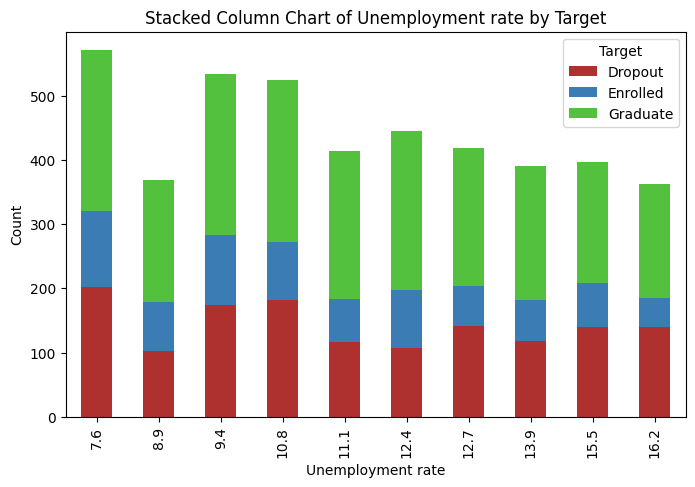

In [26]:
#Draw stacked column charts with hue = Target for cat_cols in socialfactor_cols
for col in socialfactor_cols:
      data = df_decode.groupby([col, 'Target']).size().unstack()
      if col in cat_cols:
        data = data.sort_values(by=data.columns[1], ascending=False)
      fig, ax = plt.subplots(figsize=(8, 5))
      data.plot(kind='bar', stacked=True, ax=ax, color=['#ae3130', '#3b7cb5','#53c13e'])
      ax.set_xlabel(col)
      ax.set_ylabel('Count')
      ax.set_title(f'Stacked Column Chart of {col} by Target')
      plt.show()


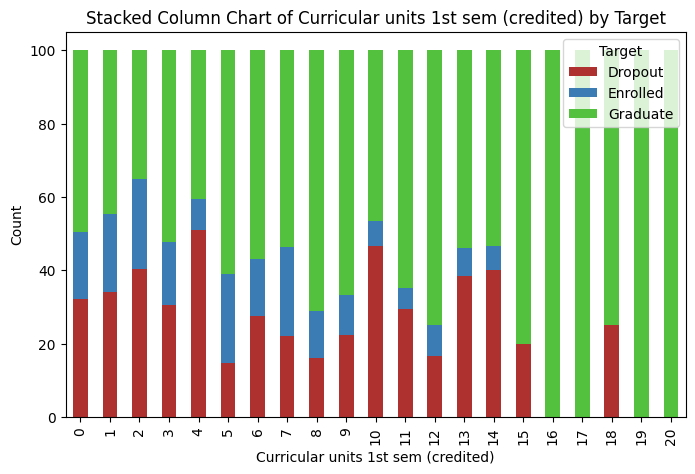

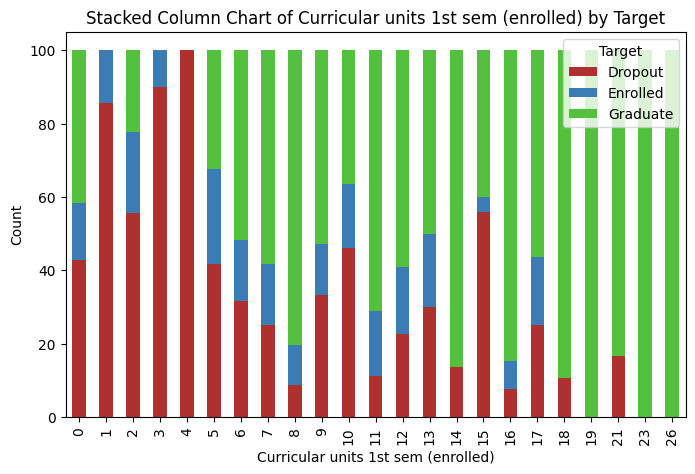

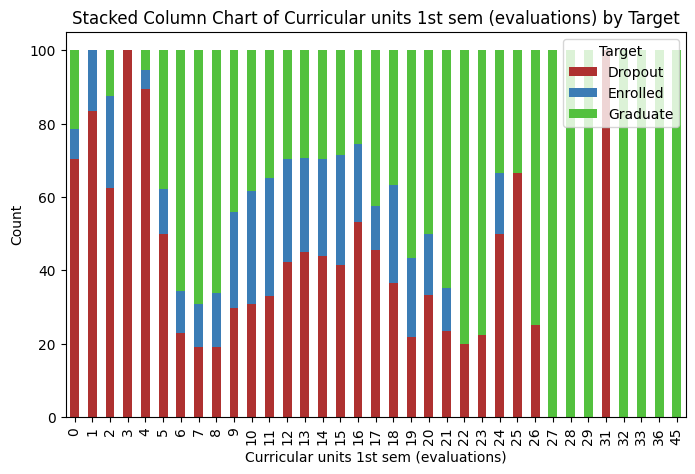

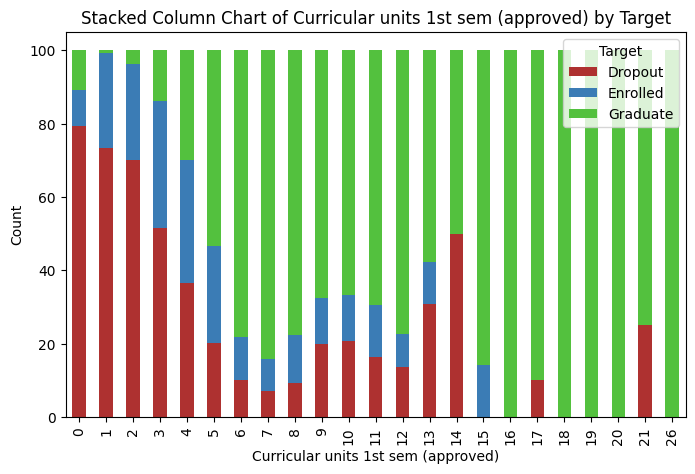

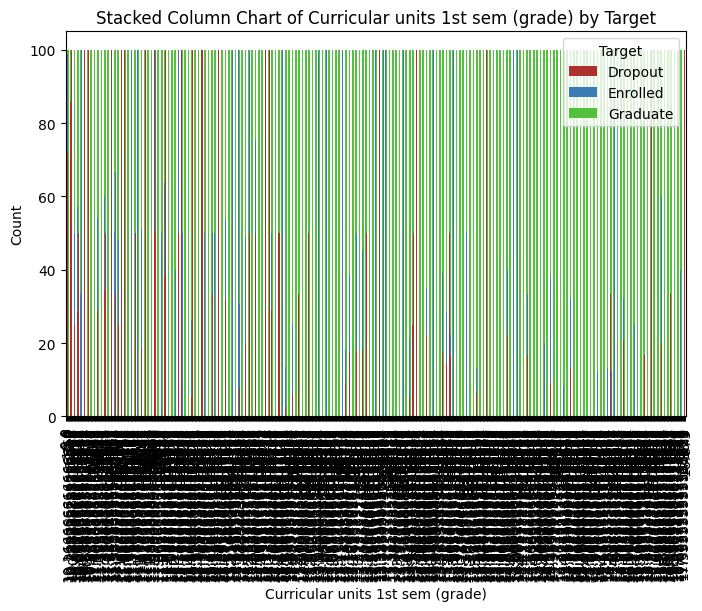

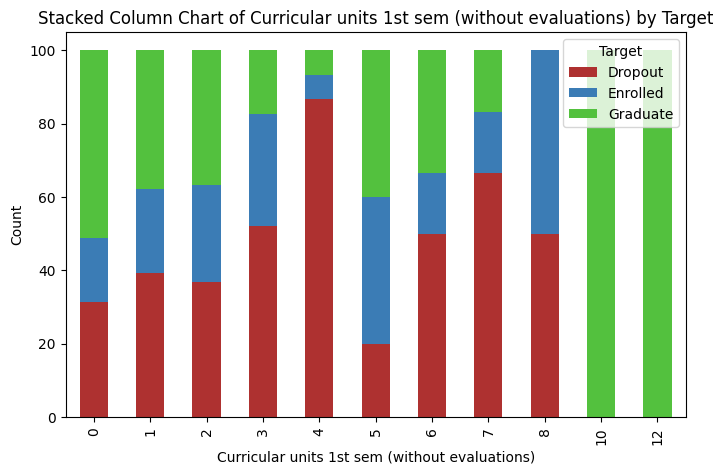

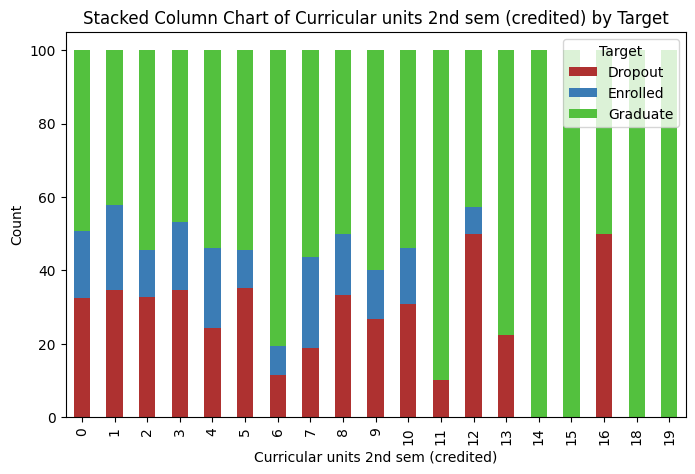

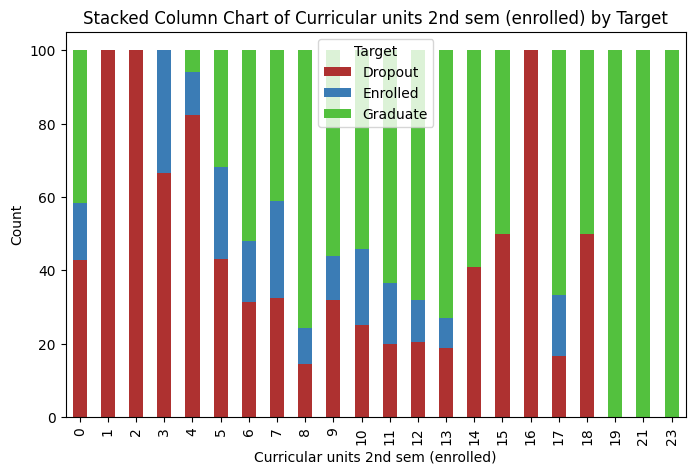

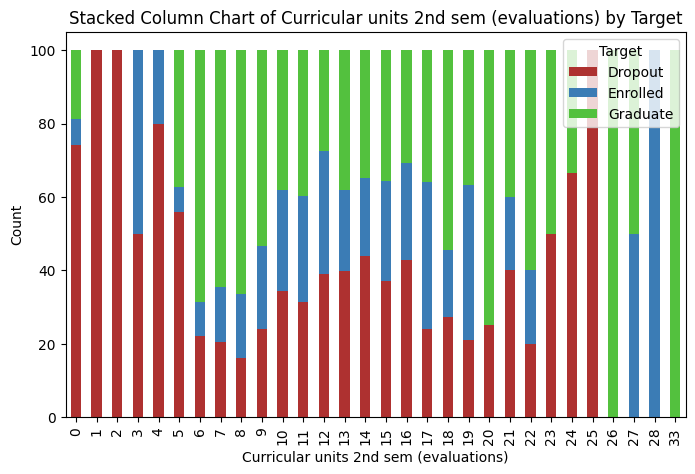

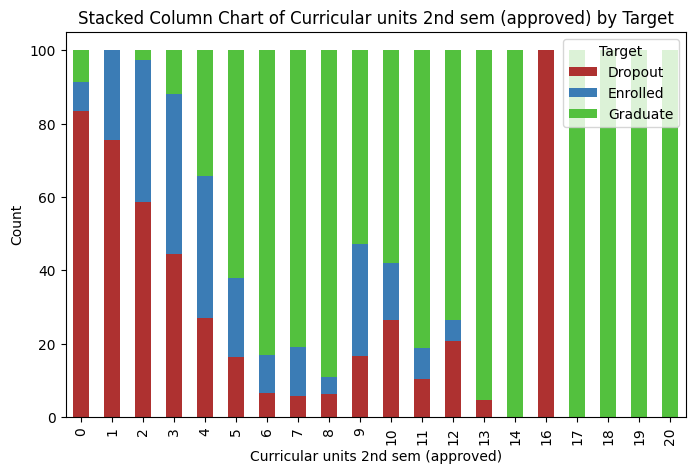

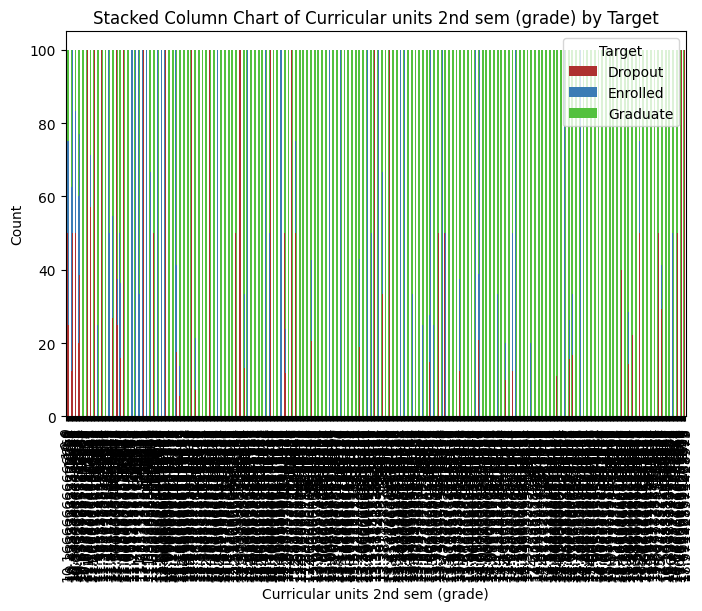

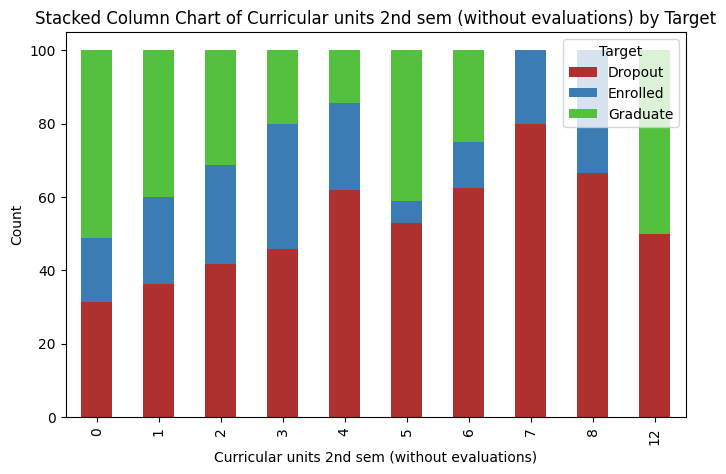

In [27]:
#Draw stacked column charts with hue = Target for cat_cols in performance_cols
for col in performance_cols:
      data = df_decode.groupby([col, 'Target']).size().unstack()
      if col in cat_cols:
        data = data.sort_values(by=data.columns[1], ascending=False)
      data_percent = data.div(data.sum(axis=1), axis=0) * 100
      fig, ax = plt.subplots(figsize=(8, 5))
      data_percent.plot(kind='bar', stacked=True, ax=ax, color=['#ae3130', '#3b7cb5','#53c13e'])
      ax.set_xlabel(col)
      ax.set_ylabel('Count')
      ax.set_title(f'Stacked Column Chart of {col} by Target')
      plt.show()
      #if col in num_cols:
       # fig, ax = plt.subplots(figsize=(8, 5))
        #sns.scatterplot(data=df_decode, x=col, y='Admission grade', hue='Target', ax=ax)

<ipython-input-28-87506f480bc3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_decode, x='Target', y=col, ax=ax, palette={"Dropout":'#ae3130', "Enrolled":'#3b7cb5',"Graduate":'#53c13e'})
<ipython-input-28-87506f480bc3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_decode, x='Target', y=col, ax=ax, palette={"Dropout":'#ae3130', "Enrolled":'#3b7cb5',"Graduate":'#53c13e'})


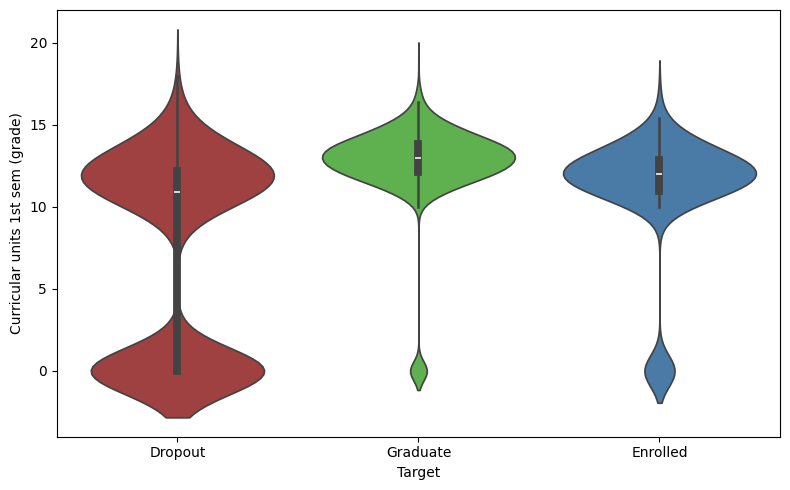

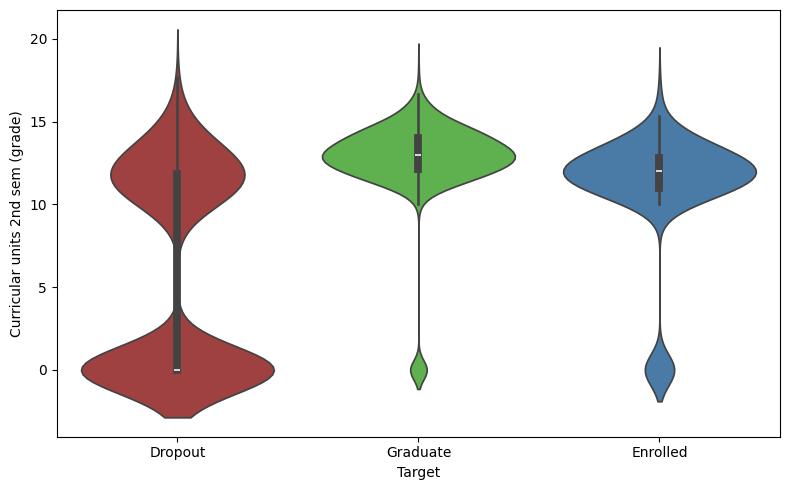

In [28]:
for col in ["Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"]:
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.violinplot(data=df_decode, x='Target', y=col, ax=ax, palette={"Dropout":'#ae3130', "Enrolled":'#3b7cb5',"Graduate":'#53c13e'})
    ax.set_xlabel('Target')
    ax.set_ylabel(col)
    ax.set_title('')
    plt.tight_layout()


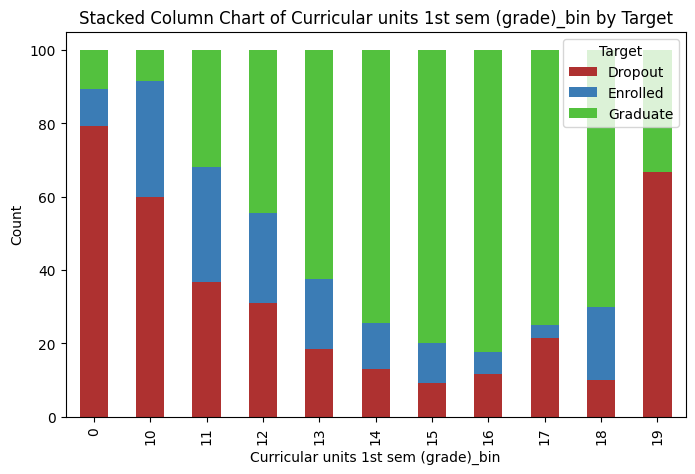

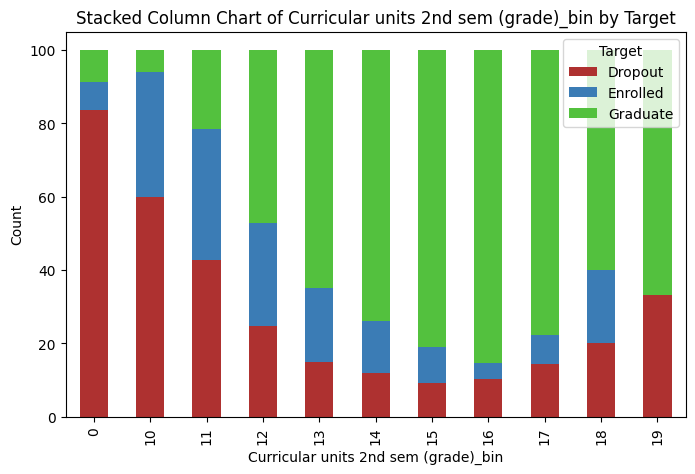

In [29]:
# creat bins = 10 for "Curricular units 1st sem (grade)" and "Curricular units 2nd sem (grade)"
for col in ["Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"]:
    df_decode[col + '_bin'] = pd.cut(df_decode[col], bins=20, labels=False)
for col in ["Curricular units 1st sem (grade)_bin", "Curricular units 2nd sem (grade)_bin"]:
      data = df_decode.groupby([col, 'Target']).size().unstack()
      if col in cat_cols:
        data = data.sort_values(by=data.columns[1], ascending=False)
      data_percent = data.div(data.sum(axis=1), axis=0) * 100
      fig, ax = plt.subplots(figsize=(8, 5))
      data_percent.plot(kind='bar', stacked=True, ax=ax, color=['#ae3130', '#3b7cb5','#53c13e'], )
      ax.set_xlabel(col)
      ax.set_ylabel('Count')
      ax.set_title(f'Stacked Column Chart of {col} by Target')
      plt.show()

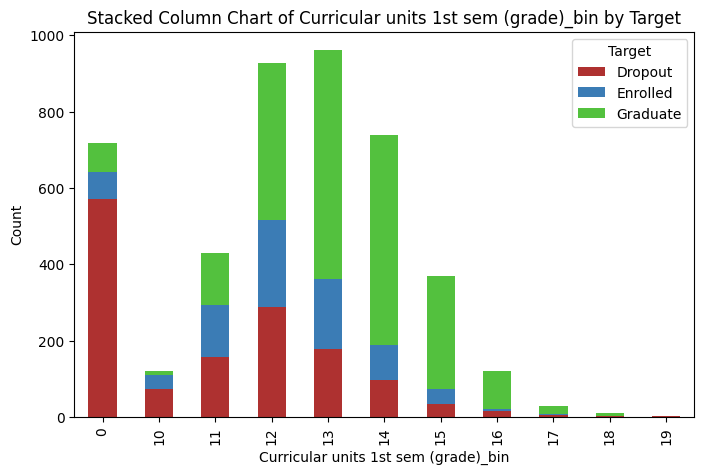

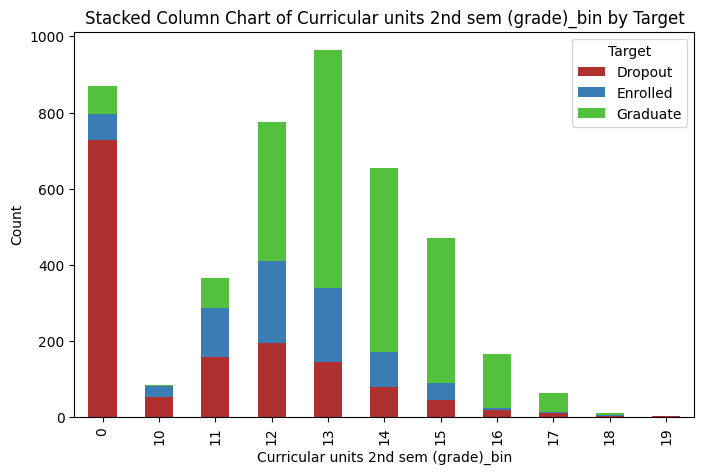

In [30]:
for col in ["Curricular units 1st sem (grade)_bin", "Curricular units 2nd sem (grade)_bin"]:
      data = df_decode.groupby([col, 'Target']).size().unstack()
      if col in cat_cols:
        data = data.sort_values(by=data.columns[1], ascending=False)
      fig, ax = plt.subplots(figsize=(8, 5))
      data.plot(kind='bar', stacked=True, ax=ax, color=['#ae3130', '#3b7cb5','#53c13e'], )
      ax.set_xlabel(col)
      ax.set_ylabel('Count')
      ax.set_title(f'Stacked Column Chart of {col} by Target')
      plt.show()

## Heatmap

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


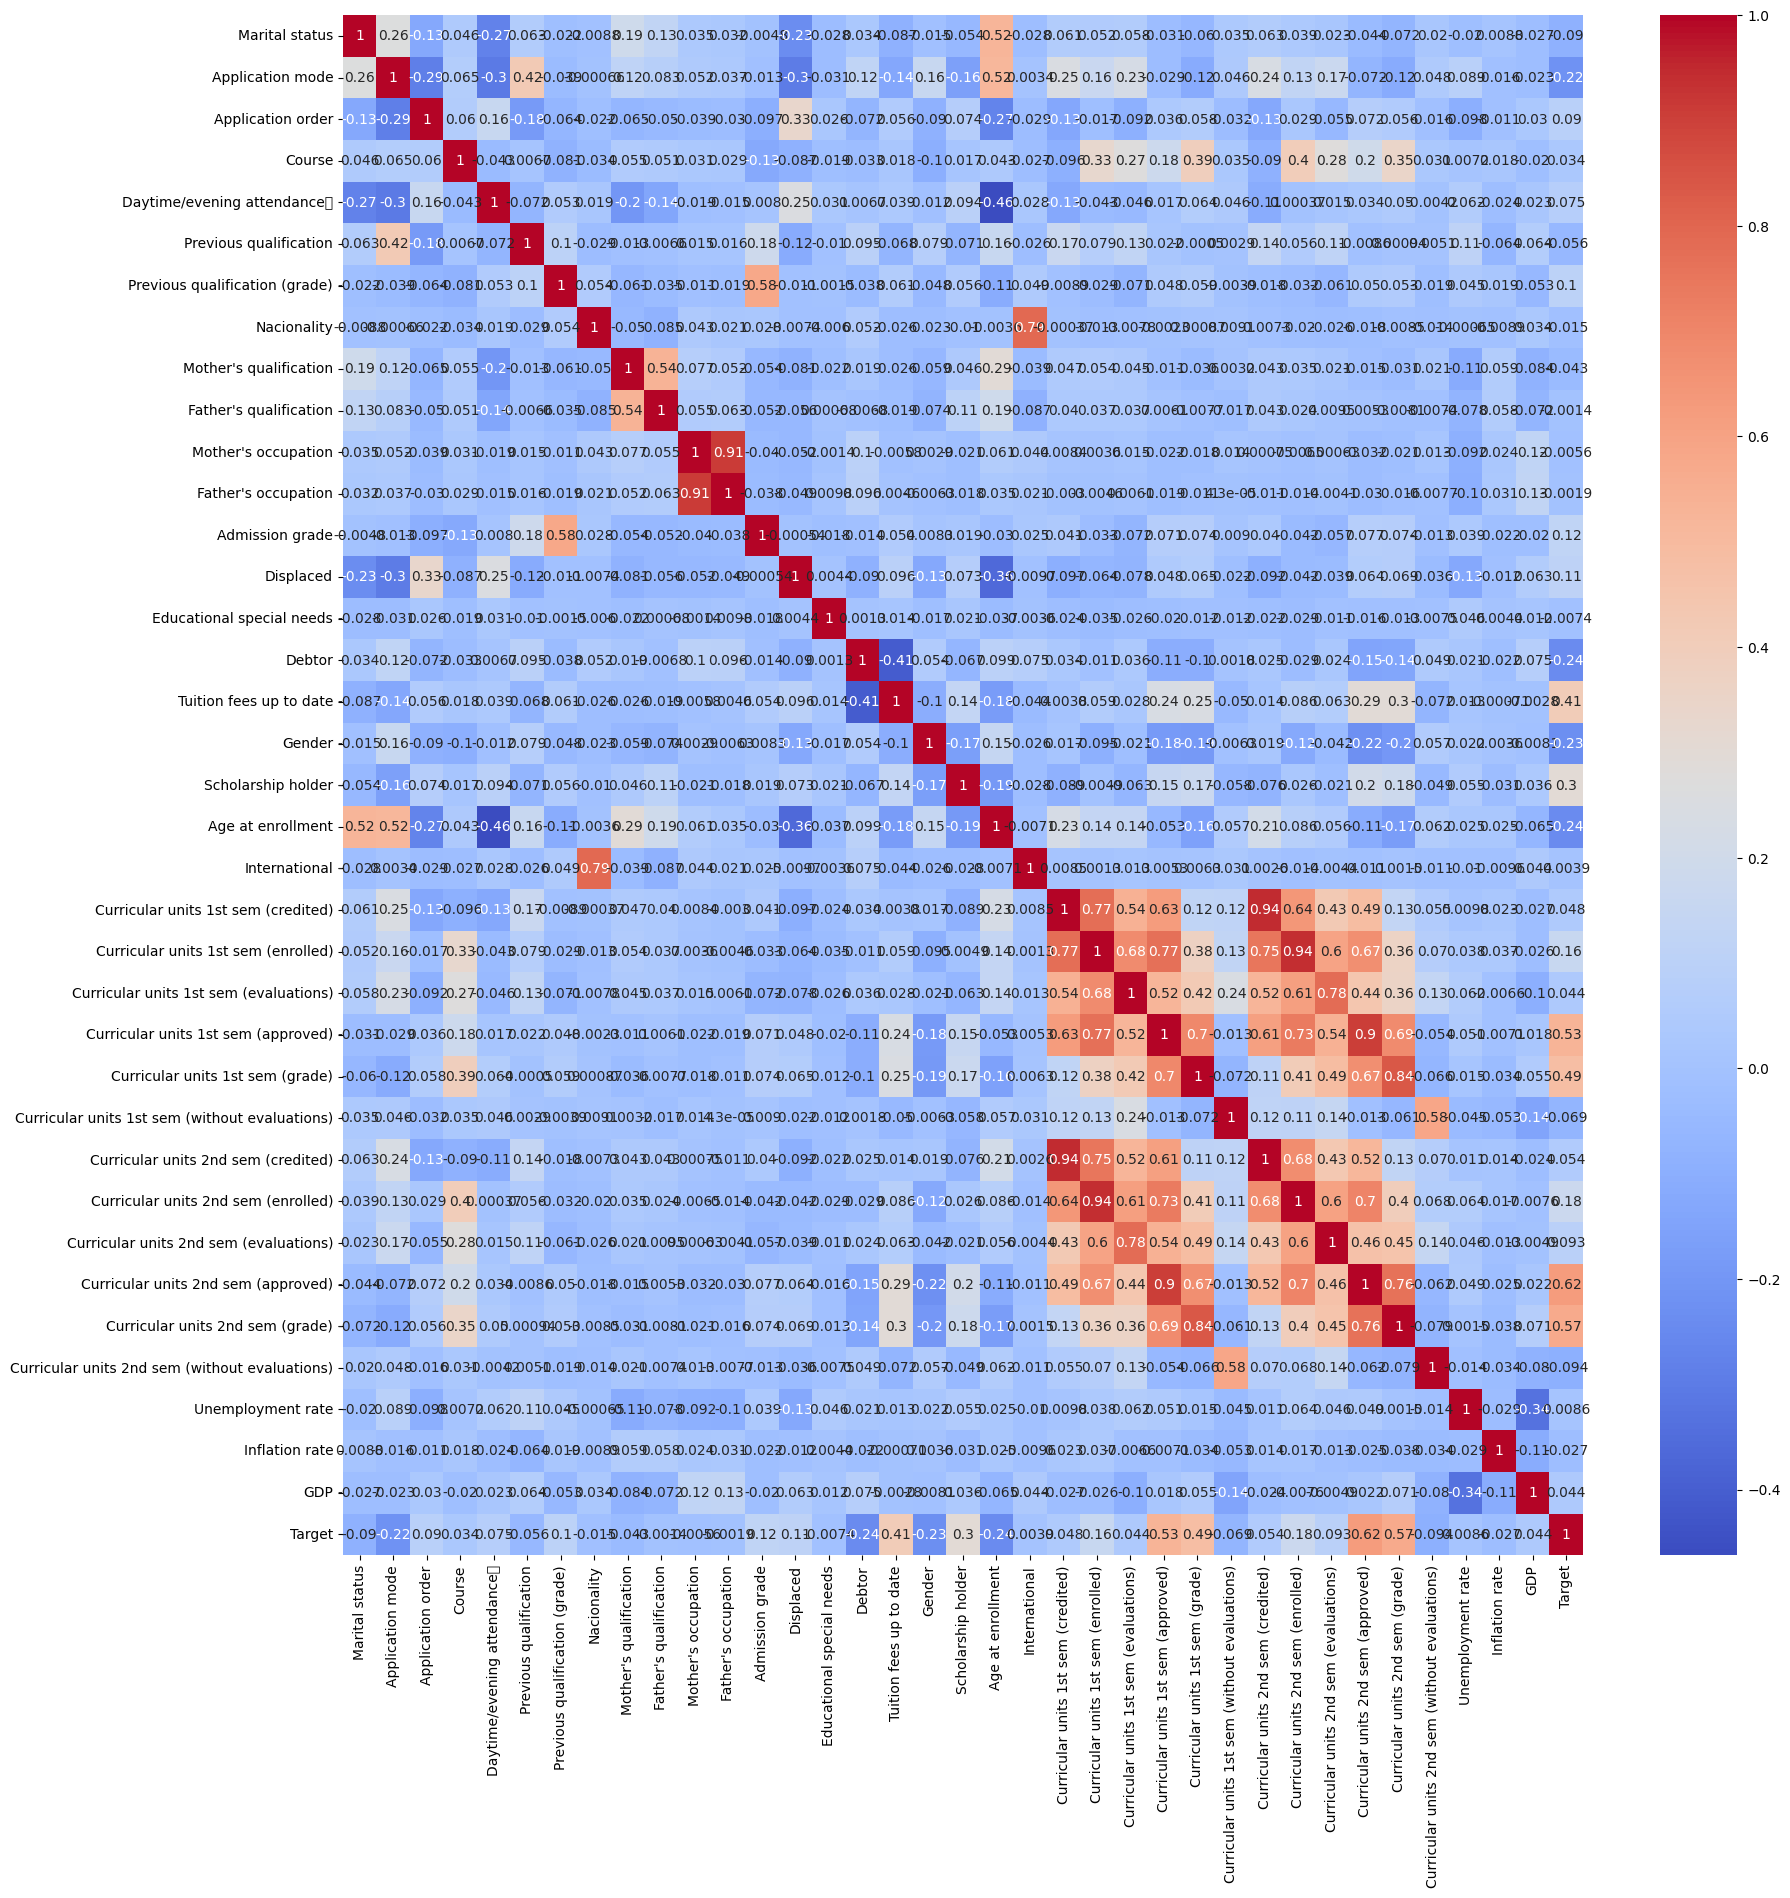

In [31]:
df_corr = df.copy()
#mapping 'Target' column
df_corr['Target'] = df_corr['Target'].map({'Dropout': -1, 'Enrolled': 0, 'Graduate': 1})
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')

In [32]:
# sort các cột có corr cao với "Target"
sort_corr = df_corr.corr()['Target'].sort_values(ascending=False)
sort_corr

Target                                            1.000000
Curricular units 2nd sem (approved)               0.624157
Curricular units 2nd sem (grade)                  0.566827
Curricular units 1st sem (approved)               0.529123
Curricular units 1st sem (grade)                  0.485207
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Curricular units 2nd sem (enrolled)               0.175847
Curricular units 1st sem (enrolled)               0.155974
Admission grade                                   0.120889
Displaced                                         0.113986
Previous qualification (grade)                    0.103764
Curricular units 2nd sem (evaluations)            0.092721
Application order                                 0.089791
Daytime/evening attendance\t                      0.075107
Curricular units 2nd sem (credited)               0.054004
Curricular units 1st sem (credited)               0.048150
Curricular units 1st sem (evaluations)            0.044362
GDP                                               0.044135
Course                                            0.034219
Unemployment rate                                 0.008627
International                                     0.003934
Father's qualification                           -0.001393
Father's occupation                              -0.001899
Mother's occupation                              -0.005629
Educational special needs                        -0.007353
Nacionality                                      -0.014801
Inflation rate                                   -0.026874
Mother's qualification                           -0.043178
Previous qualification                           -0.056039
Curricular units 1st sem (without evaluations)   -0.068702
Marital status                                   -0.089804
Curricular units 2nd sem (without evaluations)   -0.094028
Application mode                                 -0.221747
Gender                                           -0.229270
Debtor                                           -0.240999
Age at enrollment                                -0.243438
Name: Target, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


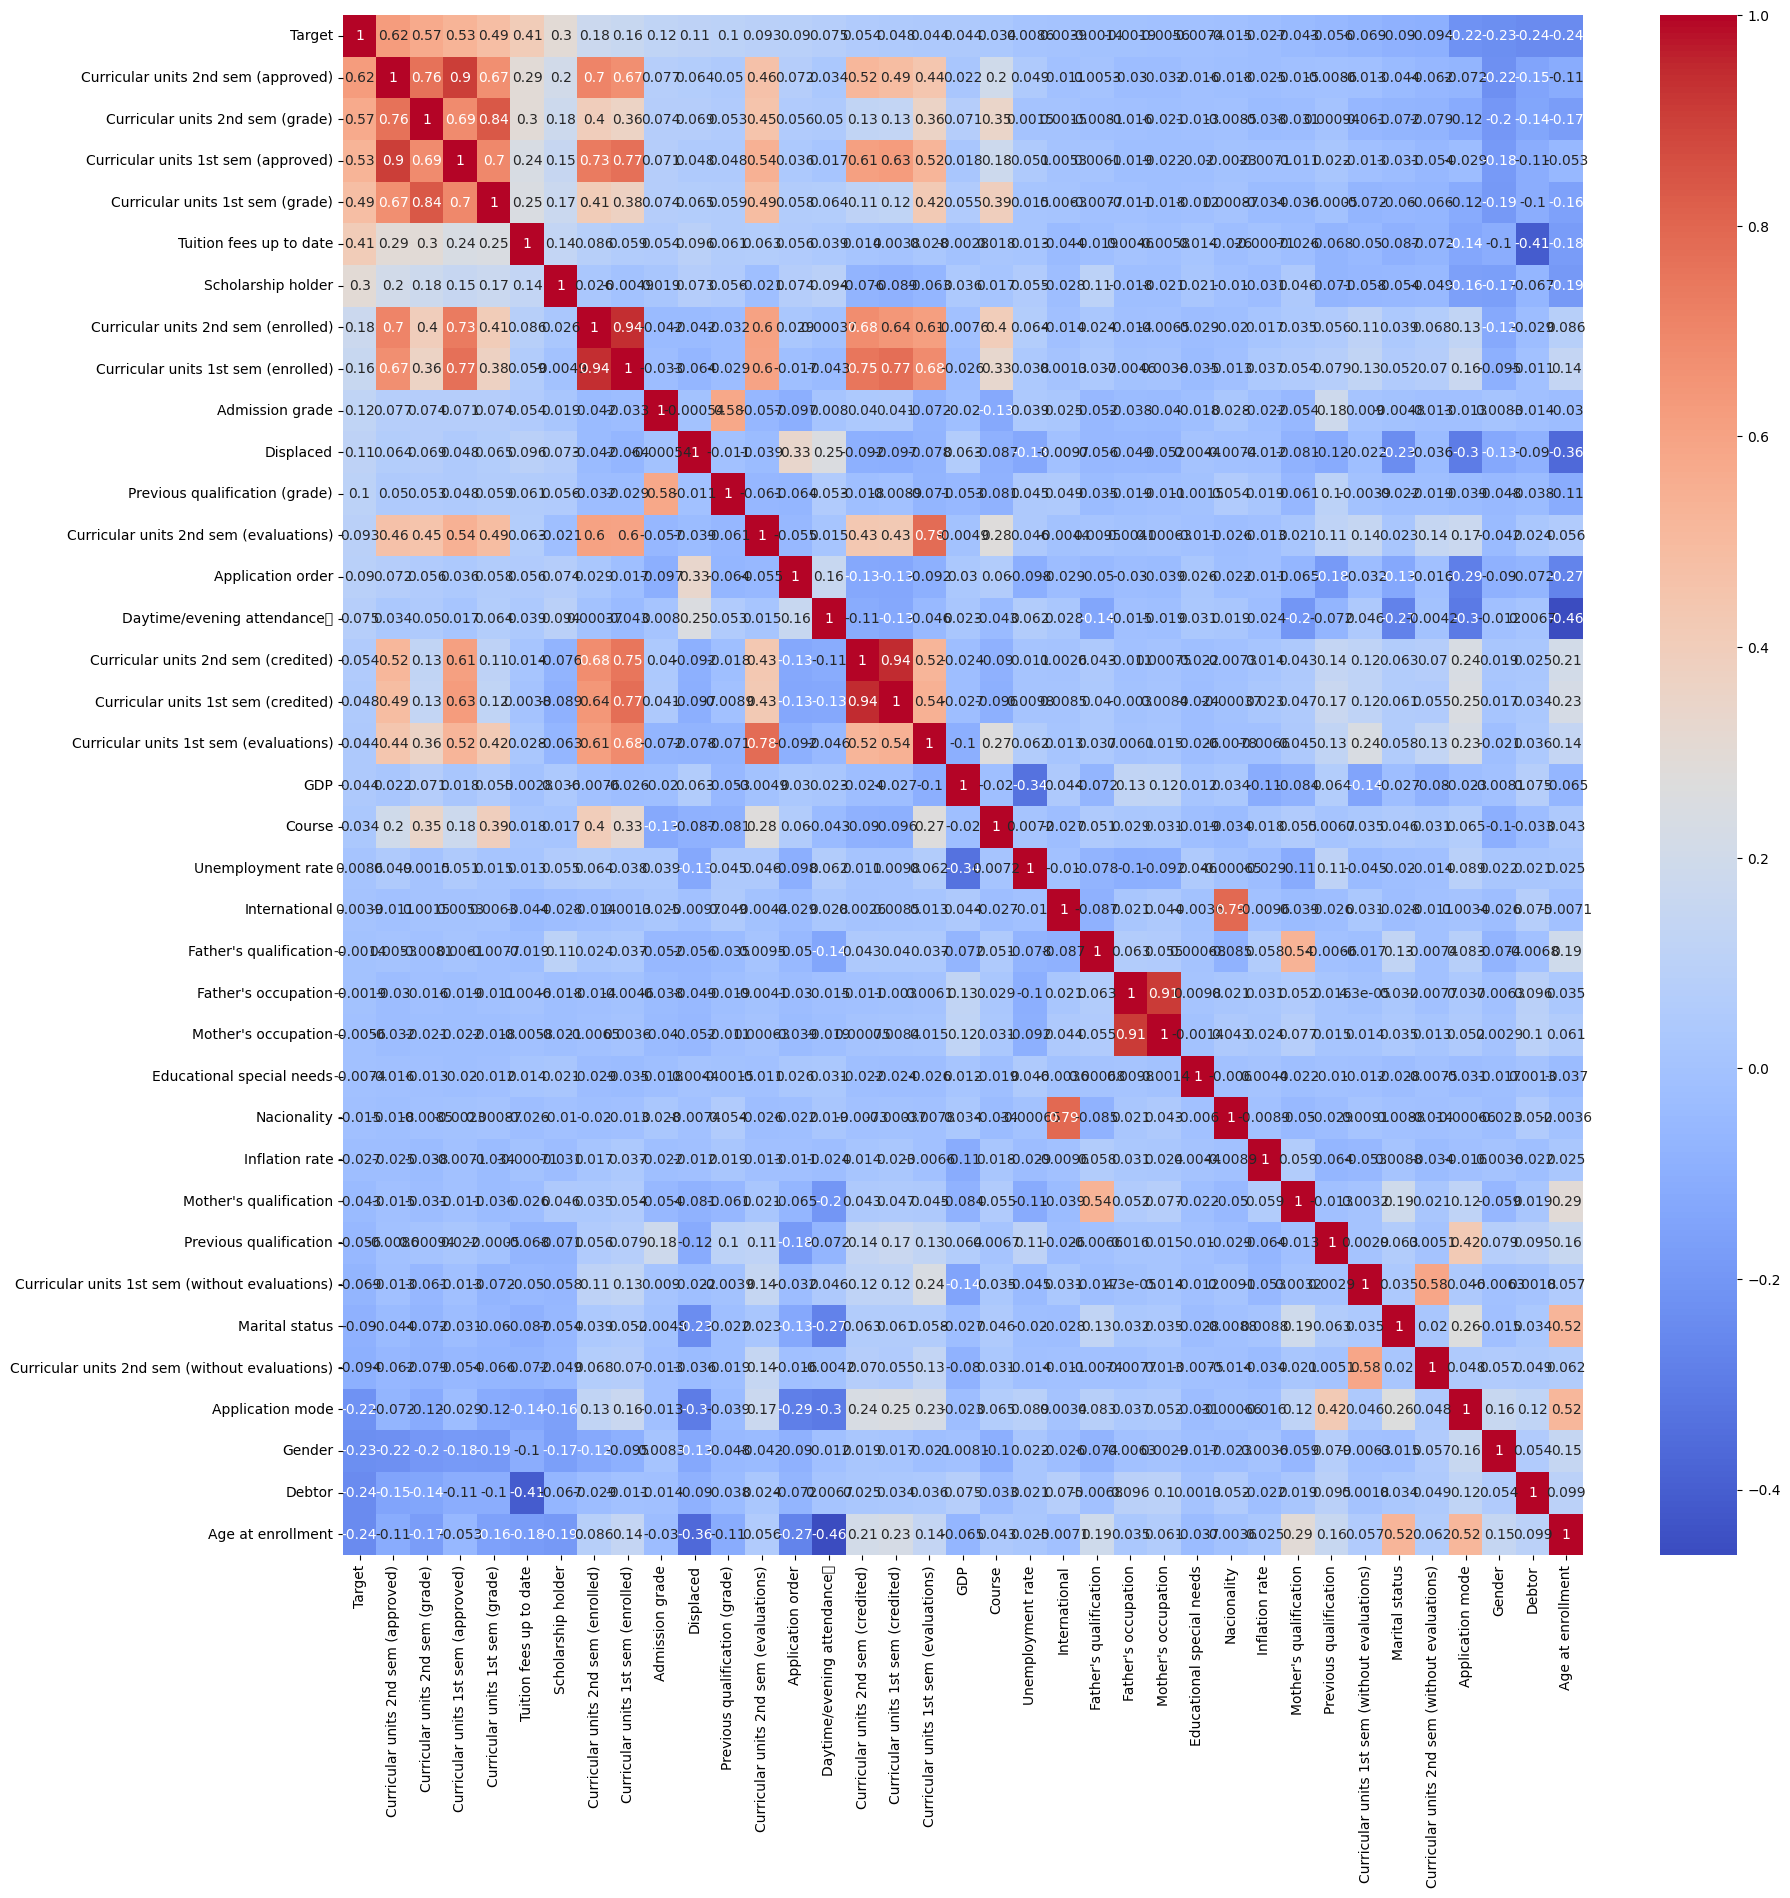

In [33]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr[sort_corr.index].corr(), annot=True, cmap='coolwarm')

In [34]:
high_corr = sort_corr[(sort_corr >= 0.06) | (sort_corr <= -0.06)]
high_corr_cols = high_corr.index.tolist()
high_corr_cols.remove('Target')
high_corr_cols

['Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Tuition fees up to date',
 'Scholarship holder',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 1st sem (enrolled)',
 'Admission grade',
 'Displaced',
 'Previous qualification (grade)',
 'Curricular units 2nd sem (evaluations)',
 'Application order',
 'Daytime/evening attendance\t',
 'Curricular units 1st sem (without evaluations)',
 'Marital status',
 'Curricular units 2nd sem (without evaluations)',
 'Application mode',
 'Gender',
 'Debtor',
 'Age at enrollment']

In [35]:
len(high_corr_cols)

21

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


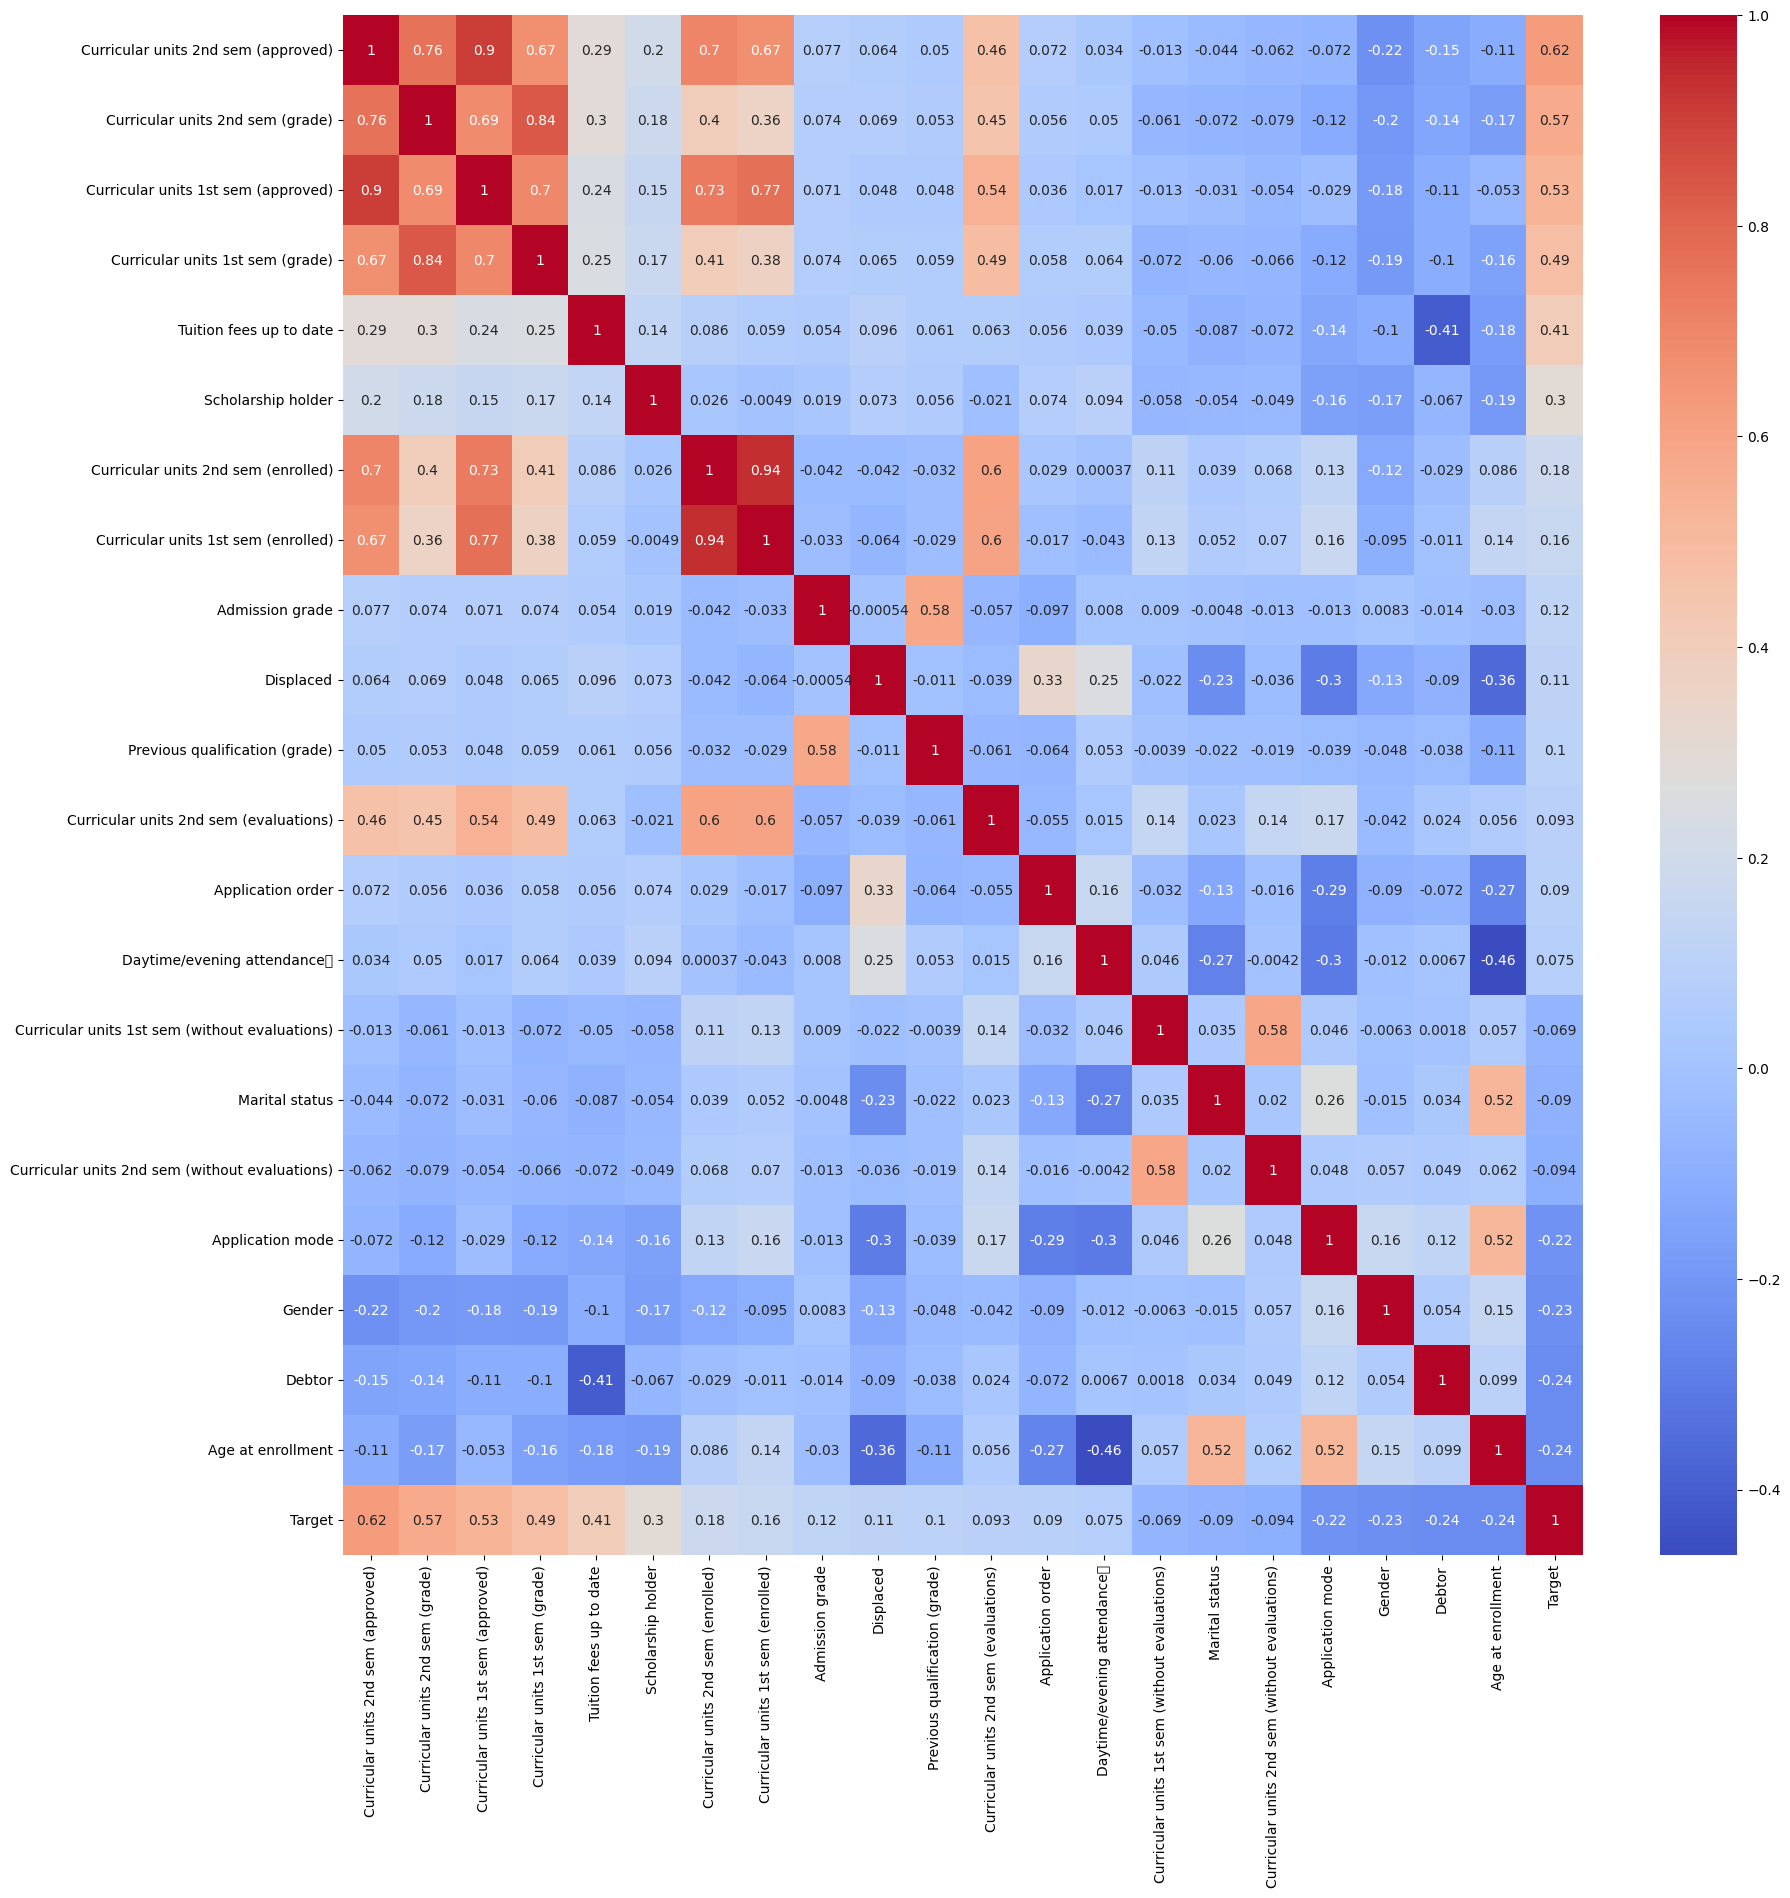

In [36]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr[high_corr_cols + ['Target']].corr(), annot=True, cmap='coolwarm')

# PREPROCESSING
- drop 'nacionality'
- Define X,y
- scaler
- train, test split
- Create df_enrolled
- Create df1, df2
- smote

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [38]:
# Drop nacionnality in df
df = df.drop('Nacionality', axis=1)

In [39]:
df_train = df[df['Target'] != 'Enrolled']
df_test = df[df['Target'] == 'Enrolled']
# Define X, y
X = df_train.drop('Target', axis=1)
y = df_train['Target']
y = y.map({'Dropout': -1, 'Enrolled': 0, 'Graduate': 1})

# Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3520, 35), (726, 35), (3520,), (726,))

# FIT MODEL
- Fit model to find importance_features
- Fit model with found importance features
- Fit different models (DT, SVM, KNN)
- Ensemble (RF, ADA, GRADIENT, XGB)
- PREDICT df_enrolled

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

from xgboost import XGBClassifier
from sklearn.decomposition import PCA


## Base Model fitting

In [41]:
# Logistic Regression
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)
y_pred_lg = model_lg.predict(X_test)
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

          -1       0.86      0.87      0.86       277
           1       0.92      0.91      0.91       449

    accuracy                           0.90       726
   macro avg       0.89      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



<ipython-input-42-50a07e8bfeaf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=IF_table1, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


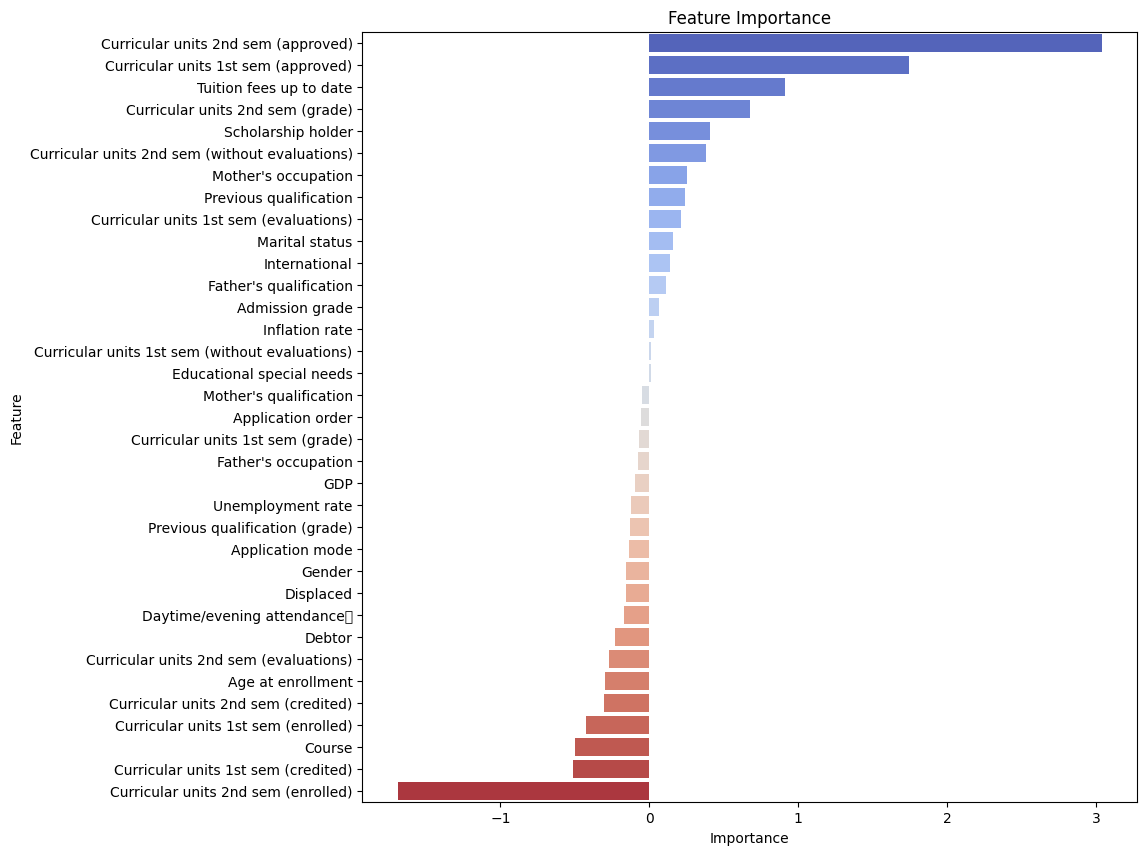

In [42]:
importance_feature1 = model_lg.coef_[0]
IF_table1 = pd.DataFrame({'Feature': X.columns, 'Importance': importance_feature1})
IF_table1.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=IF_table1, palette='coolwarm')
plt.title('Feature Importance')
plt.show()
#

In [45]:
Most_IF1 = IF_table1[(IF_table1['Importance'] > 0.3) | (IF_table1['Importance'] < -0.3)]
Most_IF1.reset_index(drop=True, inplace=True)
Most_IF1

Feature  Importance
0              Curricular units 2nd sem (approved)    3.040855
1              Curricular units 1st sem (approved)    1.741927
2                          Tuition fees up to date    0.910210
3                 Curricular units 2nd sem (grade)    0.678539
4                               Scholarship holder    0.405996
5   Curricular units 2nd sem (without evaluations)    0.378373
6              Curricular units 2nd sem (credited)   -0.305534
7              Curricular units 1st sem (enrolled)   -0.422660
8                                           Course   -0.496639
9              Curricular units 1st sem (credited)   -0.512789
10             Curricular units 2nd sem (enrolled)   -1.690116

In [42]:
#Decision Tree
model_dt = DecisionTreeClassifier(max_depth=6)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

     Dropout       0.86      0.79      0.82       277
    Graduate       0.88      0.92      0.90       449

    accuracy                           0.87       726
   macro avg       0.87      0.85      0.86       726
weighted avg       0.87      0.87      0.87       726



<ipython-input-43-ab94aea1adc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=IF_table2, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


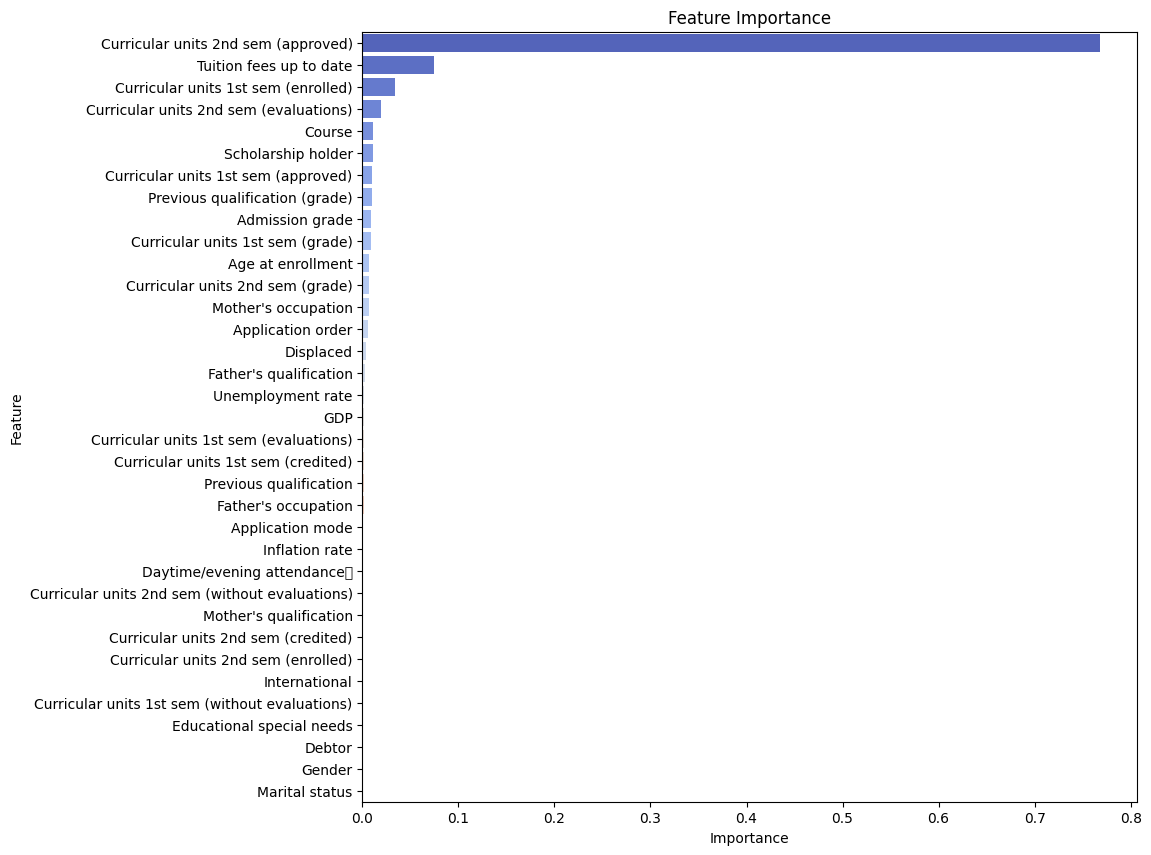

In [43]:
importance_feature2 = model_dt.feature_importances_
IF_table2 = pd.DataFrame({'Feature': X.columns, 'Importance': importance_feature2})
IF_table2.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=IF_table2, palette='coolwarm')
plt.title('Feature Importance')
plt.show()
#

In [44]:
# Exclude not important features
X_train_if = X_train.copy() # Create a copy of X_train to avoid modifying the original DataFrame

# Convert columns to strings and strip any leading/trailing spaces
X_train_if.columns = X_train_if.columns.astype(str).str.strip()
Most_IF1['Feature'] = Most_IF1['Feature'].astype(str).str.strip()

# Drop columns not in Most_IF1['Feature']
for col in X_train_if.columns:
    if col not in Most_IF1['Feature'].values:
        X_train_if.drop(col, axis=1, inplace=True)

X_test_if = X_test.copy()
X_test_if = X_test_if[[col for col in X_train_if.columns]]

<ipython-input-44-902d77d9b7fe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Most_IF1['Feature'] = Most_IF1['Feature'].astype(str).str.strip()


In [72]:
#Fit X_train_if with model_lg
model_lg.fit(X_train_if, y_train)
y_pred_lg = model_lg.predict(X_test_if)
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

          -1       0.87      0.86      0.87       277
           1       0.92      0.92      0.92       449

    accuracy                           0.90       726
   macro avg       0.89      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



In [101]:
model_lg_report = classification_report(y_test, y_pred_lg, output_dict=True)
md_lg_rp = {'model_name': 'Logistic Regression Classifier'}
for key, value in model_lg_report.items():
    if key == '1':
        md_lg_rp['1 precision'] = value['precision']
        md_lg_rp['1 recall'] = value['recall']
        md_lg_rp['1 f1-score'] = value['f1-score']
    if key == '-1':
        md_lg_rp['-1 precision'] = value['precision']
        md_lg_rp['-1 recall'] = value['recall']
        md_lg_rp['-1 f1-score'] = value['f1-score']
    if key == 'accuracy':
        md_lg_rp['accuracy'] = value

md_lg_rp

{'model_name': 'Logistic Regression Classifier',
 '-1 precision': 0.8690909090909091,
 '-1 recall': 0.8628158844765343,
 '-1 f1-score': 0.8659420289855072,
 '1 precision': 0.9157427937915743,
 '1 recall': 0.9198218262806236,
 '1 f1-score': 0.9177777777777778,
 'accuracy': 0.8980716253443526}

In [84]:
#Fit X_train_if with model_dt
model_dt.fit(X_train_if, y_train)
y_pred_dt = model_dt.predict(X_test_if)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

          -1       0.86      0.83      0.84       277
           1       0.90      0.92      0.91       449

    accuracy                           0.88       726
   macro avg       0.88      0.87      0.88       726
weighted avg       0.88      0.88      0.88       726



In [100]:
model_dt_report = classification_report(y_test, y_pred_dt, output_dict=True)
md_dt_rp = {'model_name': 'Decision Tree Classifier'}
for key, value in model_dt_report.items():
    if key == '1':
        md_dt_rp['1 precision'] = value['precision']
        md_dt_rp['1 recall'] = value['recall']
        md_dt_rp['1 f1-score'] = value['f1-score']
    if key == '-1':
        md_dt_rp['-1 precision'] = value['precision']
        md_dt_rp['-1 recall'] = value['recall']
        md_dt_rp['-1 f1-score'] = value['f1-score']
    if key == 'accuracy':
        md_dt_rp['accuracy'] = value

md_dt_rp

{'model_name': 'Decision Tree Classifier',
 '-1 precision': 0.8582089552238806,
 '-1 recall': 0.8303249097472925,
 '-1 f1-score': 0.8440366972477065,
 '1 precision': 0.8973799126637555,
 '1 recall': 0.9153674832962138,
 '1 f1-score': 0.906284454244763,
 'accuracy': 0.8829201101928374}

## SVM, KNN with gridsearch

In [47]:
y_train = y_train.map({'Dropout': -1, 'Enrolled': 0, 'Graduate': 1})

In [156]:
# SVM
model_svm = SVC(verbose = 0, probability=True)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
params_svm = {
              'C': [10, 50, 100],
              'gamma': ['scale'],
              'kernel': ['rbf', 'poly'],
              'degree' : [2]
              }

grid_svm = GridSearchCV(model_svm, params_svm, cv=kf, scoring='f1')
grid_svm.fit(X_train_if, y_train)
grid_svm.best_params_

{'C': 50, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [167]:
model_svm_best = SVC(C= 50, degree= 2, gamma= 'scale', kernel= 'rbf', probability=True, verbose = 0)
model_svm_best.fit(X_train_if, y_train)
y_pred_svm_best = model_svm_best.predict(X_test_if)
print(classification_report(y_test, y_pred_svm_best))


              precision    recall  f1-score   support

          -1       0.91      0.83      0.87       277
           1       0.90      0.95      0.93       449

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.90      0.90       726



In [49]:
model_svm_linear = SVC(kernel='linear', verbose = 0)
model_svm_linear.fit(X_train, y_train)
model_svm_linear.coef_

array([[ 9.87668600e-02, -7.14996115e-02, -2.86271757e-02,
        -1.58088584e-01, -9.52463576e-02,  1.39837425e-01,
        -8.80047426e-02, -6.13739945e-02,  5.60166037e-02,
         1.33675566e-01, -1.64782607e-03,  2.80835925e-02,
        -6.10279285e-02, -2.26955553e-03, -1.38899957e-01,
         6.24797874e-01, -9.23870390e-02,  2.34501921e-01,
        -1.76216592e-01,  1.04252147e-01, -4.36610815e-01,
        -3.77001700e-01,  2.19604636e-01,  1.24968161e+00,
        -1.36874726e-01, -6.12412640e-02, -7.14298485e-02,
        -1.21568107e+00, -1.19269846e-01,  1.94626979e+00,
         5.24604048e-01,  2.88397379e-01, -1.02168952e-01,
        -4.11764757e-02, -5.74392670e-02]])

In [50]:
# Evaluate
y_test = y_test.map({'Dropout': -1, 'Enrolled': 0, 'Graduate': 1})
y_pred_svm = grid_svm.predict(X_test_if)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

          -1       0.91      0.83      0.87       277
           1       0.90      0.95      0.93       449

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.90      0.90       726



In [157]:
model_svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
md_svm_rp = {'model_name': 'SVM Classifier'}
for key, value in model_svm_report.items():
    if key == '1':
        md_svm_rp['1 precision'] = value['precision']
        md_svm_rp['1 recall'] = value['recall']
        md_svm_rp['1 f1-score'] = value['f1-score']
    if key == '-1':
        md_svm_rp['-1 precision'] = value['precision']
        md_svm_rp['-1 recall'] = value['recall']
        md_svm_rp['-1 f1-score'] = value['f1-score']
    if key == 'accuracy':
        md_svm_rp['accuracy'] = value

md_svm_rp

{'model_name': 'SVM Classifier',
 '-1 precision': 0.9094488188976378,
 '-1 recall': 0.8339350180505415,
 '-1 f1-score': 0.8700564971751412,
 '1 precision': 0.902542372881356,
 '1 recall': 0.9487750556792873,
 '1 f1-score': 0.9250814332247557,
 'accuracy': 0.9049586776859504}

<ipython-input-51-39778929ce24>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=IF_table3, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


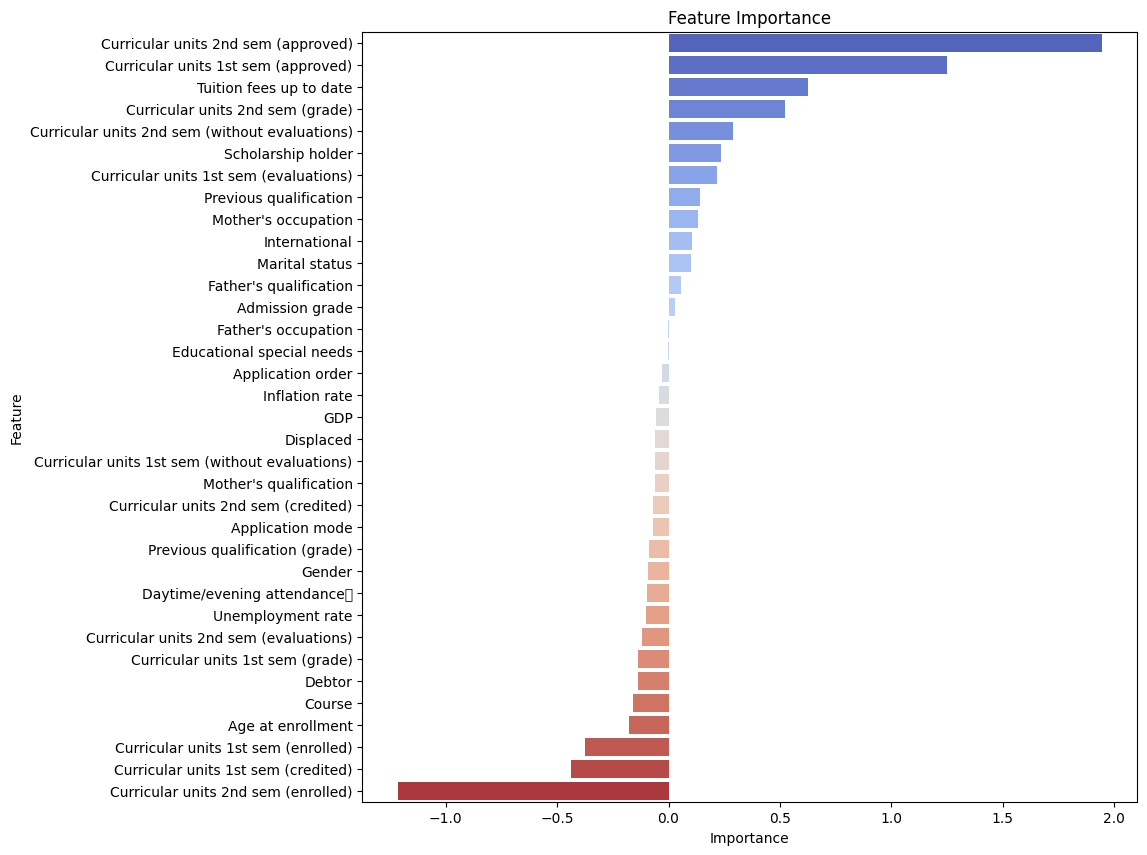

In [51]:
importance_feature3 = model_svm_linear.coef_[0]
IF_table3 = pd.DataFrame({'Feature': X.columns, 'Importance': importance_feature3})
IF_table3.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=IF_table3, palette='coolwarm')
plt.title('Feature Importance')
plt.show()

In [52]:
# KNN
model_knn = KNeighborsClassifier()
kf = KFold(n_splits=10, shuffle=True, random_state=42)
params_knn = {
              'n_neighbors': [5,6,7],
              'weights': ['uniform', 'distance'],
              'p': [1,2]
              }

grid_knn = GridSearchCV(model_knn, params_knn, cv=kf, scoring='f1')
grid_knn.fit(X_train_if, y_train)
grid_knn.best_params_

{'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}

In [168]:
model_knn_best = KNeighborsClassifier(n_neighbors= 6, weights= 'uniform', p=1)
model_knn_best.fit(X_train_if, y_train)
y_pred_knn_best = model_knn_best.predict(X_test_if)
print(classification_report(y_test, y_pred_knn_best))

              precision    recall  f1-score   support

          -1       0.89      0.81      0.85       277
           1       0.89      0.94      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



In [53]:
# Evaluate
y_pred_knn = grid_knn.predict(X_test_if)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

          -1       0.89      0.81      0.85       277
           1       0.89      0.94      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



In [98]:
model_knn_report = classification_report(y_test, y_pred_knn, output_dict=True)

md_knn_rp = {'model_name': 'KNN Classifier'}
for key, value in model_knn_report.items():
    if key == '1':
        md_knn_rp['1 precision'] = value['precision']
        md_knn_rp['1 recall'] = value['recall']
        md_knn_rp['1 f1-score'] = value['f1-score']
    if key == '-1':
        md_knn_rp['-1 precision'] = value['precision']
        md_knn_rp['-1 recall'] = value['recall']
        md_knn_rp['-1 f1-score'] = value['f1-score']
    if key == 'accuracy':
        md_knn_rp['accuracy'] = value

md_knn_rp

{'model_name': 'KNN Classifier',
 '-1 precision': 0.8893280632411067,
 '-1 recall': 0.8122743682310469,
 '-1 f1-score': 0.8490566037735849,
 '1 precision': 0.8900634249471459,
 '1 recall': 0.9376391982182628,
 '1 f1-score': 0.913232104121475,
 'accuracy': 0.8898071625344353}

## Ensemble Learning

In [54]:
# RandomForrest
model_rf = RandomForestClassifier(verbose=0, random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
params_rf = {
              'n_estimators': [30,50,100],
              'max_depth': [5,6,7],
              'criterion': ['gini', 'entropy']
            }

grid_rf = GridSearchCV(model_rf, params_rf, cv=kf, scoring='f1')
grid_rf.fit(X_train_if, y_train)
grid_rf.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 50}

In [169]:
model_rf_best = RandomForestClassifier(n_estimators= 50, max_depth= 7, criterion= 'entropy', random_state=42, verbose=0)
model_rf_best.fit(X_train_if, y_train)
y_pred_rf_best = model_rf_best.predict(X_test_if)
print(classification_report(y_test, y_pred_rf_best))

              precision    recall  f1-score   support

          -1       0.90      0.82      0.86       277
           1       0.89      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.89       726



In [55]:
# Evaluate
y_pred_rf = grid_rf.predict(X_test_if)
print(classification_report(y_test, y_pred_rf))
#

              precision    recall  f1-score   support

          -1       0.90      0.82      0.86       277
           1       0.89      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.89       726



In [97]:
model_rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
md_rf_rp = {'model_name': 'Random Forest Classifier'}
for key, value in model_rf_report.items():
    if key == '1':
        md_rf_rp['1 precision'] = value['precision']
        md_rf_rp['1 recall'] = value['recall']
        md_rf_rp['1 f1-score'] = value['f1-score']
    if key == '-1':
        md_rf_rp['-1 precision'] = value['precision']
        md_rf_rp['-1 recall'] = value['recall']
        md_rf_rp['-1 f1-score'] = value['f1-score']
    if key == 'accuracy':
        md_rf_rp['accuracy'] = value

md_rf_rp

{'model_name': 'Random Forest Classifier',
 '-1 precision': 0.8972332015810277,
 '-1 recall': 0.8194945848375451,
 '-1 f1-score': 0.8566037735849057,
 '1 precision': 0.8942917547568711,
 '1 recall': 0.9420935412026726,
 '1 f1-score': 0.9175704989154013,
 'accuracy': 0.8953168044077136}

In [62]:
# ADABoost
model_ada = AdaBoostClassifier(random_state=4,
                               n_estimators=20,
                               estimator = SVC(C = 50, degree = 2, gamma = 'scale', kernel= 'rbf', probability=True))
model_ada.fit(X_train_if, y_train)
y_pred_ada = model_ada.predict(X_test_if)
print(classification_report(y_test, y_pred_ada))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

          -1       0.97      0.70      0.82       277
           1       0.84      0.99      0.91       449

    accuracy                           0.88       726
   macro avg       0.91      0.85      0.86       726
weighted avg       0.89      0.88      0.88       726



In [96]:
model_ada_report = classification_report(y_test, y_pred_ada, output_dict=True)
#model_ada_report = pd.DataFrame(model_ada_report).transpose()

md_ada_rp = {'model_name': 'ADA Boost Classifier'}
for key, value in model_ada_report.items():
    if key == '1':
        md_ada_rp['1 precision'] = value['precision']
        md_ada_rp['1 recall'] = value['recall']
        md_ada_rp['1 f1-score'] = value['f1-score']
    if key == '-1':
        md_ada_rp['-1 precision'] = value['precision']
        md_ada_rp['-1 recall'] = value['recall']
        md_ada_rp['-1 f1-score'] = value['f1-score']
    if key == 'accuracy':
        md_ada_rp['accuracy'] = value

md_ada_rp

{'model_name': 'ADA Boost Classifier',
 '-1 precision': 0.975,
 '-1 recall': 0.703971119133574,
 '-1 f1-score': 0.8176100628930818,
 '1 precision': 0.844106463878327,
 '1 recall': 0.9888641425389755,
 '1 f1-score': 0.9107692307692308,
 'accuracy': 0.8801652892561983}

In [111]:
# Gradient Boost
model_gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_depth=5, random_state=19)
model_gb.fit(X_train_if, y_train)
y_pred_gb = model_gb.predict(X_test_if)
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

          -1       0.84      0.86      0.85       277
           1       0.91      0.90      0.90       449

    accuracy                           0.88       726
   macro avg       0.88      0.88      0.88       726
weighted avg       0.88      0.88      0.88       726



In [112]:
model_gb_report = classification_report(y_test, y_pred_gb, output_dict=True)
md_gb_rp = {'model_name': 'Gradient Boost Classifier'}
for key, value in model_gb_report.items():
    if key == '1':
        md_gb_rp['1 precision'] = value['precision']
        md_gb_rp['1 recall'] = value['recall']
        md_gb_rp['1 f1-score'] = value['f1-score']
    if key == '-1':
        md_gb_rp['-1 precision'] = value['precision']
        md_gb_rp['-1 recall'] = value['recall']
        md_gb_rp['-1 f1-score'] = value['f1-score']
    if key == 'accuracy':
        md_gb_rp['accuracy'] = value

md_gb_rp

{'model_name': 'Gradient Boost Classifier',
 '-1 precision': 0.8404255319148937,
 '-1 recall': 0.855595667870036,
 '-1 f1-score': 0.8479427549194991,
 '1 precision': 0.9099099099099099,
 '1 recall': 0.8997772828507795,
 '1 f1-score': 0.9048152295632699,
 'accuracy': 0.8829201101928374}

In [115]:
# XG Boost
y_train_xgb = y_train.map({-1: 0, 1: 1})
y_test_xgb = y_test.map({-1: 0, 1: 1})
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.5, max_depth=5, random_state=19)
model_xgb.fit(X_train_if, y_train_xgb)
y_pred_xgb = model_xgb.predict(X_test_if)
print(classification_report(y_test_xgb, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       277
           1       0.92      0.94      0.93       449

    accuracy                           0.91       726
   macro avg       0.90      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



In [116]:
model_xgb_report = classification_report(y_test_xgb, y_pred_xgb, output_dict=True)
md_xgb_rp = {'model_name': 'XGBoost Classifier'}
for key, value in model_xgb_report.items():
    if key == '1':
        md_xgb_rp['1 precision'] = value['precision']
        md_xgb_rp['1 recall'] = value['recall']
        md_xgb_rp['1 f1-score'] = value['f1-score']
    if key == '0':
        md_xgb_rp['-1 precision'] = value['precision']
        md_xgb_rp['-1 recall'] = value['recall']
        md_xgb_rp['-1 f1-score'] = value['f1-score']
    if key == 'accuracy':
        md_xgb_rp['accuracy'] = value

md_xgb_rp

{'model_name': 'XGBoost Classifier',
 '-1 precision': 0.8913857677902621,
 '-1 recall': 0.8592057761732852,
 '-1 f1-score': 0.875,
 '1 precision': 0.9150326797385621,
 '1 recall': 0.9354120267260579,
 '1 f1-score': 0.9251101321585903,
 'accuracy': 0.90633608815427}

In [191]:
# Create a general report table by combining report tables of the built models where each row display: model name, accuracy, '-1' precision, '1' precision, '-1' recall, '1' recall, '-1' f1-score, '1' f1-score
general_report = {
                        'model_name':[],
                        'accuracy':[],
                        '-1 precision':[],
                        '1 precision':[],
                        '-1 recall':[],
                        '1 recall':[],
                        '-1 f1-score':[],
                        '1 f1-score':[]
                  }

list_rp = [md_lg_rp, md_dt_rp, md_svm_rp, md_knn_rp, md_rf_rp, md_ada_rp, md_gb_rp, md_xgb_rp]
for rp in list_rp:
    general_report['model_name'].append(rp['model_name'])
    general_report['accuracy'].append(rp['accuracy'])
    general_report['-1 precision'].append(rp['-1 precision'])
    general_report['1 precision'].append(rp['1 precision'])
    general_report['-1 recall'].append(rp['-1 recall'])
    general_report['1 recall'].append(rp['1 recall'])
    general_report['-1 f1-score'].append(rp['-1 f1-score'])
    general_report['1 f1-score'].append(rp['1 f1-score'])

general_report = pd.DataFrame(general_report)
for col in general_report.columns[1:]:
    general_report[col] = general_report[col].apply(lambda x: round(x, 4))
general_report.sort_values(by='-1 f1-score', ascending=False, inplace=True)
general_report

model_name  accuracy  -1 precision  1 precision  \
7              XGBoost Classifier    0.9063        0.8914       0.9150   
2                  SVM Classifier    0.9050        0.9094       0.9025   
0  Logistic Regression Classifier    0.8981        0.8691       0.9157   
4        Random Forest Classifier    0.8953        0.8972       0.8943   
3                  KNN Classifier    0.8898        0.8893       0.8901   
6       Gradient Boost Classifier    0.8829        0.8404       0.9099   
1        Decision Tree Classifier    0.8829        0.8582       0.8974   
5            ADA Boost Classifier    0.8802        0.9750       0.8441   

   -1 recall  1 recall  -1 f1-score  1 f1-score  
7     0.8592    0.9354       0.8750      0.9251  
2     0.8339    0.9488       0.8701      0.9251  
0     0.8628    0.9198       0.8659      0.9178  
4     0.8195    0.9421       0.8566      0.9176  
3     0.8123    0.9376       0.8491      0.9132  
6     0.8556    0.8998       0.8479      0.9048  
1     0.8303    0.9154       0.8440      0.9063  
5     0.7040    0.9889       0.8176      0.9108

In [ ]:
#Visualize numerical columns
fig, axes = plt.subplots(3, 7, figsize=(40, 20))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, 21):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

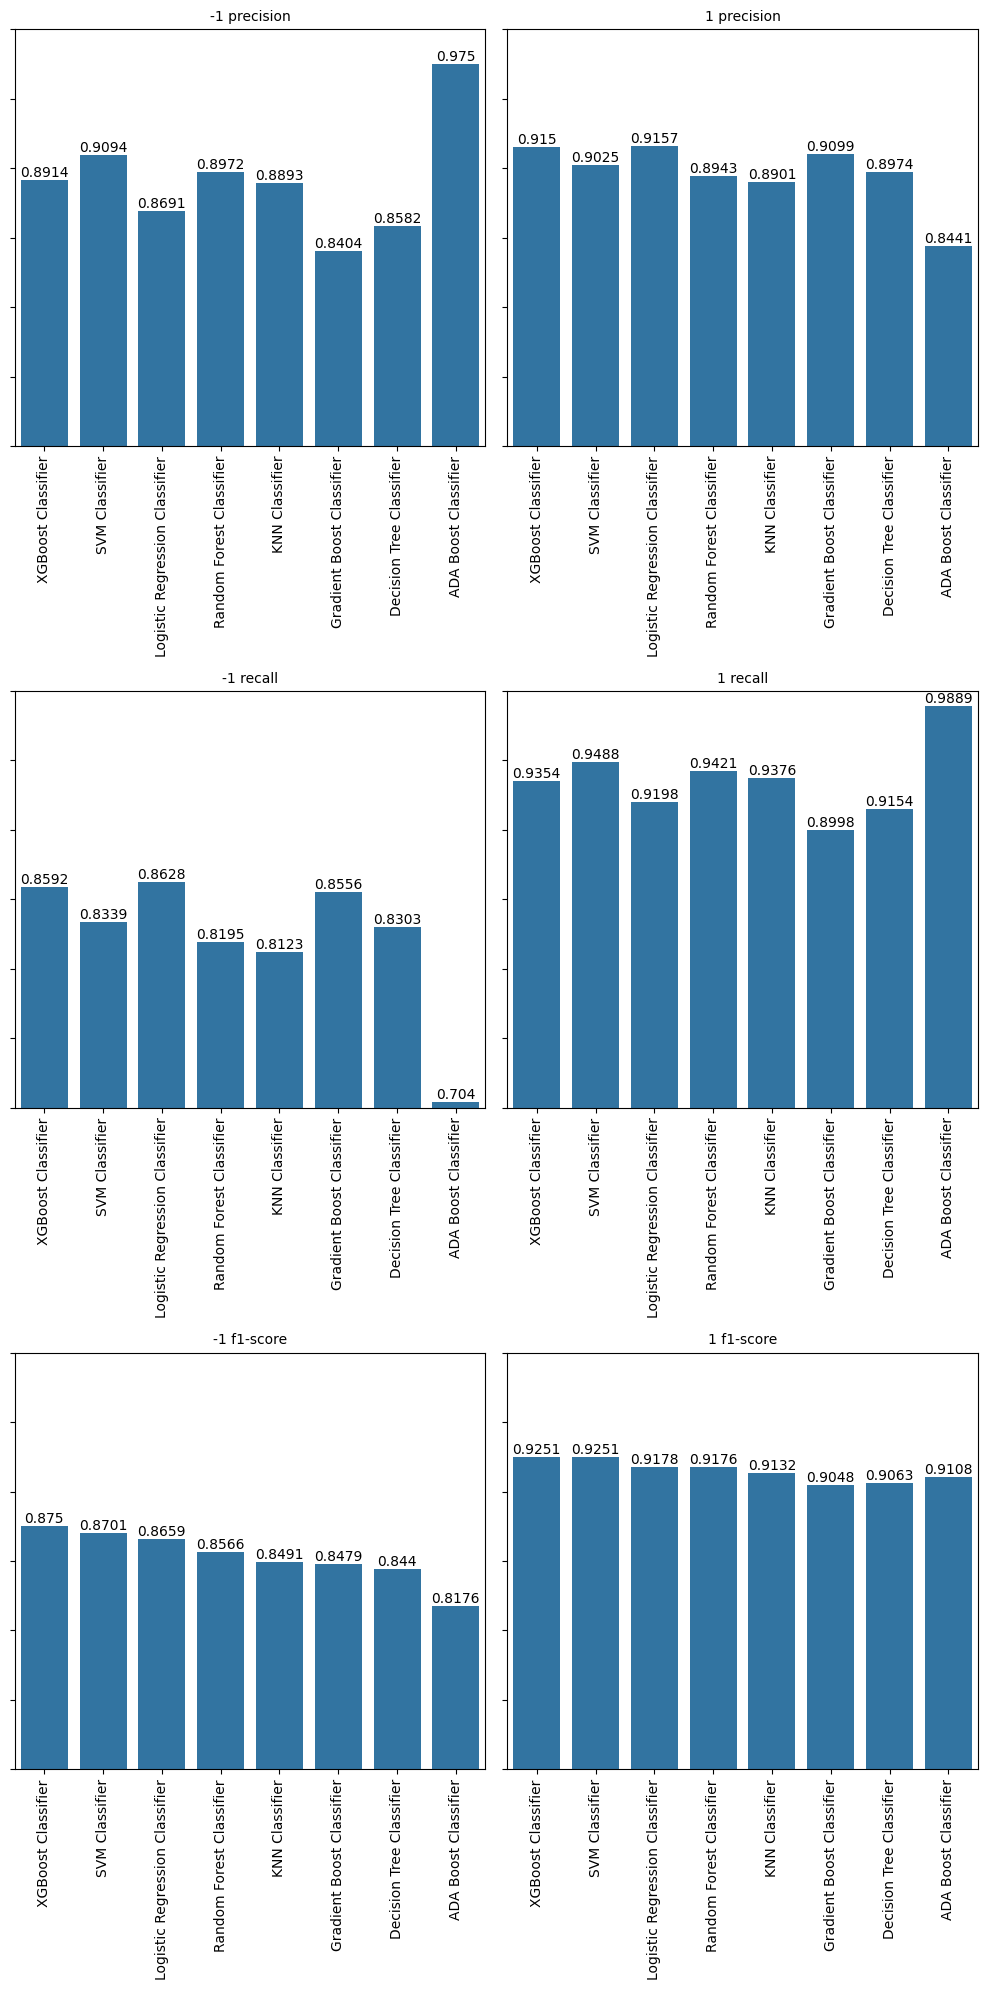

In [147]:
fig, axes = plt.subplots(3, 2, figsize=(10, 20))
axes = axes.flatten()

for i, col in enumerate(general_report.columns[2:]):
    sns.barplot(data=general_report, x='model_name', y=col, ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].tick_params(axis='x', rotation=90)
    #Show value on the bar
    for j, v in enumerate(general_report[col]):
        axes[i].text(j, v, str(round(v, 4)), ha='center', va='bottom')
    axes[i].set_yticklabels([])
    axes[i].set_ylim(0.7, 1)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(i+1, 6):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
#

Best model based on -1 F1-score


In [154]:
general_report[['model_name']+['-1 f1-score']]

model_name  -1 f1-score
7              XGBoost Classifier       0.8750
2                  SVM Classifier       0.8701
0  Logistic Regression Classifier       0.8659
4        Random Forest Classifier       0.8566
3                  KNN Classifier       0.8491
6       Gradient Boost Classifier       0.8479
1        Decision Tree Classifier       0.8440
5            ADA Boost Classifier       0.8176

In [165]:
model_voting = VotingClassifier(estimators=[('xgb', model_xgb), ('svm', model_svm), ('lg', model_lg), ('rf', model_rf), ('knn', model_knn)], voting='soft')
model_voting.fit(X_train_if, y_train)
y_pred_voting = model_voting.predict(X_test_if)
print(classification_report(y_test, y_pred_voting))

              precision    recall  f1-score   support

          -1       0.89      0.85      0.87       277
           1       0.91      0.94      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726



In [171]:
#Voting model
model_voting = VotingClassifier(estimators=[('xgb', model_xgb), ('svm', model_svm_best), ('lg', model_lg), ('rf', model_rf_best), ('knn', model_knn_best)], voting='soft')
model_voting.fit(X_train_if, y_train)
y_pred_voting = model_voting.predict(X_test_if)
print(classification_report(y_test, y_pred_voting))
#

              precision    recall  f1-score   support

          -1       0.91      0.86      0.88       277
           1       0.91      0.95      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726



In [180]:
X_train_if.columns

Index(['Course', 'Tuition fees up to date', 'Scholarship holder',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)'],
      dtype='object')

## Predict df_enrolled

In [181]:
df_test_scaled = scaler.transform(df_test)
df_test_scaled = pd.DataFrame(df_test_scaled, columns=df_test.columns)
df_test_final = df_test_scaled[['Course', 'Tuition fees up to date', 'Scholarship holder',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']]
df_test_final.columns

Index(['Course', 'Tuition fees up to date', 'Scholarship holder',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)'],
      dtype='object')

In [183]:
y_pred_enroll = model_voting.predict(df_test_final)

In [184]:
#add y_pred_enroll to df_test
df_test['Target_pred'] = y_pred_enroll
df_test['Target_pred'] = df_test['Target_pred'].map({-1: 'Dropout', 1: 'Graduate'})
df_test.head()

Marital status  Application mode  Application order  Course  \
16               1                18                  1    9238   
19               1                 1                  1    9853   
21               1                18                  4    9556   
25               1                 1                  1    9238   
27               1                 1                  1    9085   

    Daytime/evening attendance\t  Previous qualification  \
16                             1                       1   
19                             1                       1   
21                             1                       1   
25                             1                       1   
27                             1                       1   

    Previous qualification (grade)  Mother's qualification  \
16                           137.0                      19   
19                           140.0                      19   
21                           127.0                       1   
25                           151.0                      19   
27                           138.0                      19   

    Father's qualification  Mother's occupation  Father's occupation  \
16                      38                    5                    8   
19                      19                    7                    7   
21                      38                    4                    7   
25                      38                    9                    9   
27                      19                    3                    3   

    Admission grade  Displaced  Educational special needs  Debtor  \
16            137.4          1                          0       0   
19            124.6          1                          0       0   
21            121.8          1                          0       0   
25            157.0          1                          0       1   
27            131.0          1                          0       0   

    Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  \
16                        1       0                   0                 18   
19                        1       0                   0                 18   
21                        1       0                   0                 20   
25                        1       0                   1                 18   
27                        1       0                   0                 18   

    International  Curricular units 1st sem (credited)  \
16              0                                    0   
19              0                                    0   
21              0                                    0   
25              0                                    0   
27              0                                    0   

    Curricular units 1st sem (enrolled)  \
16                                    6   
19                                    7   
21                                    7   
25                                    6   
27                                    5   

    Curricular units 1st sem (evaluations)  \
16                                      10   
19                                       7   
21                                      14   
25                                       8   
27                                       9   

    Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
16                                    1                         12.000000   
19                                    6                         11.666667   
21                                    7                         11.437500   
25                                    5                         11.600000   
27                                    5                         12.666667   

    Curricular units 1st sem (without evaluations)  \
16                                               0   
19                                               0   
21                                      

In [188]:
df_test['Target_pred'].value_counts()

Target_pred
Graduate    425
Dropout     369
Name: count, dtype: int64

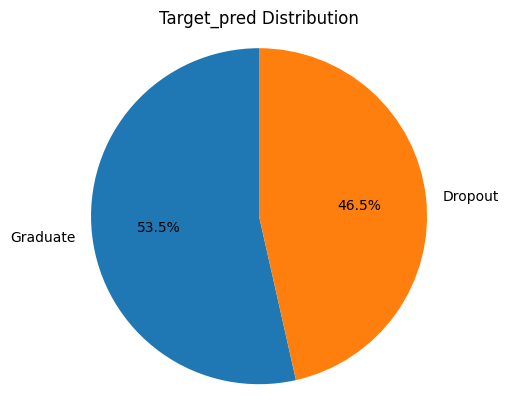

In [189]:
fig, ax = plt.subplots()
ax.pie(df_test['Target_pred'].value_counts(), labels=df_test['Target_pred'].value_counts().index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Target_pred Distribution')
plt.show()